# Exercise: Introduction to Pytorch
---

This week’s exercise will walk you through the basics of Pytorch. The goal is for you to be familiar with:
- What is a computational graph
- How to define a pytorch data loader
- How to build a neural network in pytorch
- How to define a pytorch optimizer
- How to train a neural network in pytorch


In addition to this exercise, we recommend you to have a look at the official tutorials on pytorch.org

https://pytorch.org/tutorials/index.html

Links:

- [Task2: Play with MNIST Fashion and Pytroch](#Task2)



Software verion:
- Python 3.6
- Pytorch 1.0


<a id='Task2'></a>
## Task2: Play with MNIST Fashion and Pytroch

---
Your task is to use Pytorch to build a model and train a neural network on the MNIST Fashion dataset. Before you can start you need to have access to the MNIST Fashion dataset. If you use an IFI computer, the defualt path given in this jupyter notebook will root you to the data. If you work on any other computer, you will need to download the MNIST Fashion dataset. You can download the files from: https://github.com/zalandoresearch/fashion-mnist/tree/master/data/fashion

MINST Fashion files:
- t10k-images-idx3-ubyte.gz
- t10k-labels-idx1-ubyte.gz
- train-images-idx3-ubyte.gz
- train-labels-idx1-ubyte.gz

The MNIST Fashion dataset have 10 classes: ['T-shirt / top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'].  

The training set consists of 60,000 images and the test set consists of 10,000 images. The images are of size [28,28].


**Important!**
You will need to add code at locations indicated with "ToDo" only.



- <b>"%matplotlib inline"</b> is used to plot figures within the jupyter notebook


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision as tv
from utils.utility_functions import datasetFashionMNIST
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

%matplotlib inline

---
### Step 1: Handling of the data

The following cell creates two instances of "datasetFashionMNIST". The "datasetFashionMNIST" is a "torch.utils.data.Dataset" written for the MNIST Fashion dataset.

If you do not use an IFI computer edit the "dataPath" to the location of the MNIST Fashion dataset.


In [2]:
#Path to the MNIST Fashion files
#tv.datasets.FashionMNIST('data/MNIST_fashion', train=True, transform=None, target_transform=None, download=True)
dataPath = 'data/MNIST_fashion/FashionMNIST/raw/'
#dataPath = '/projects/in5400/MNIST_fashion/'

# Create dataset objects
train_dataset = datasetFashionMNIST(dataPath=dataPath, train=True)
val_dataset   = datasetFashionMNIST(dataPath=dataPath, train=False)


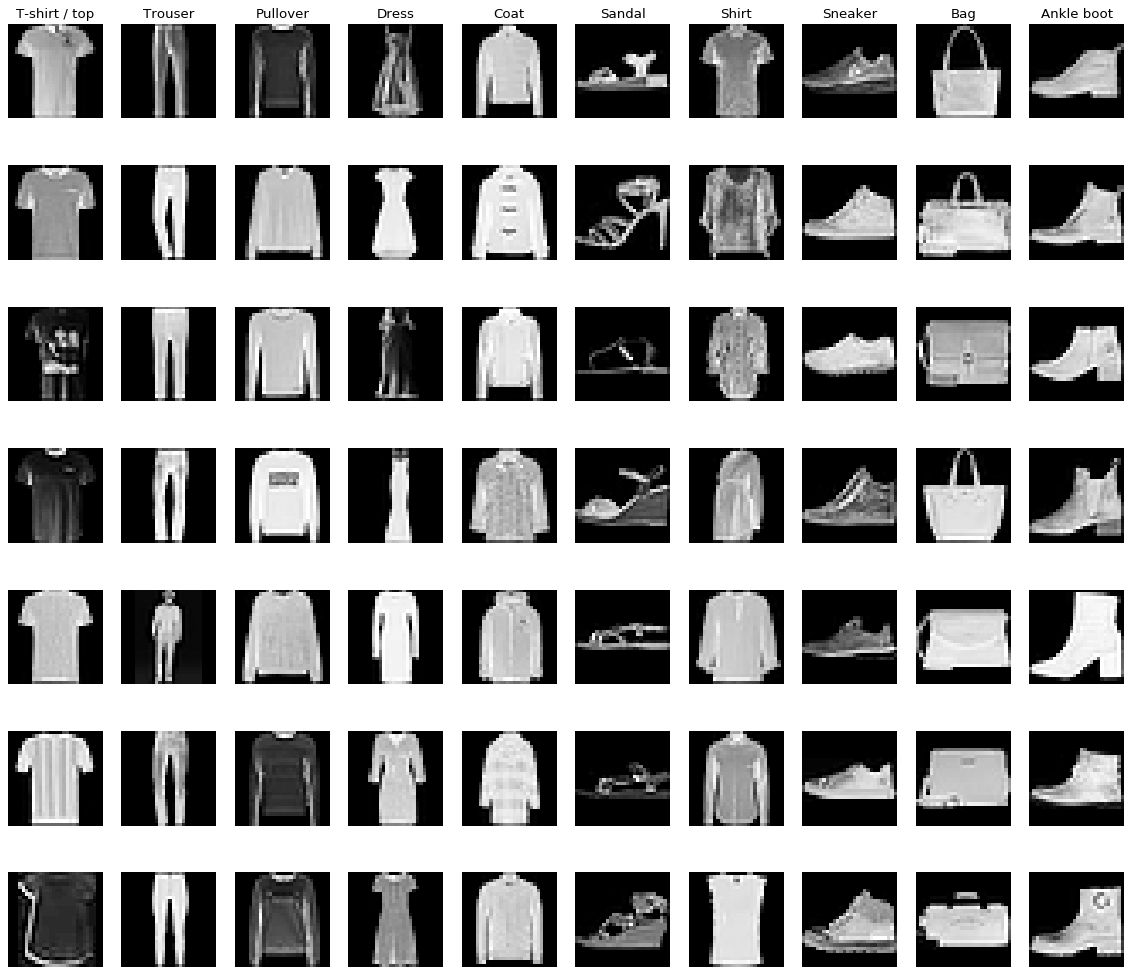

In [3]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['T-shirt / top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
num_classes = len(classes)
samples_per_class = 7
plt.figure(figsize=(18, 16), dpi=80)
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(np.array(train_dataset.labels) == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        img = (train_dataset.images[idx,:]).astype(np.uint8)
        img = np.resize(img, (28, 28))   # reshape to 28x28
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

---
To keep track of important parameters, we use dictionary "config". You should experiment with different values for the batch size, learning rate and number of epochs trained.

 

In [4]:
config = {
          'batch_size':128,
          'use_cuda': False,       #True=use Nvidia GPU | False use CPU
          'log_interval':20,      #How often to dislay (batch) loss during training
          'epochs': 20,           #Number of epochs
          'learningRate': 0.001
         }

With the instances of "datasetFashionMNIST" we can iterate through the data, however we would like to use pytorch's "torch.utils.data.DataLoader" class. It is convenient as it helps us with batching and shuffling of the data. It also makes it possible to use multiple CPU cores/threads to speed up data preprocessing. Your task is to instantiate two data loaders (one for each of the training and validation dataset objects), using PyTorch dataloader "torch.utils.data.DataLoader". Consider if you will use multiple workers and shuffling of data.

In [5]:
# DataLoaders

#ToDo
train_loader = torch.utils.data.DataLoader(train_dataset)
val_loader   = torch.utils.data.DataLoader(val_dataset)


---
### Step 2: Build the model

You are now to define the network architecture. By default, the neural network is a fully connected neural network (dense neural network) with two hidden layer of size 128 and 64. We encourage you to play with the network configuration.

The input has shape [batch size, 28x28]. The 28x28 image size are being concatenated in "datasetFashionMNIST". Try to change:
- The number of layers
- The size of the hidden layers
- The activation functions


Note that the model inherits from "torch.nn.Module", which requires the two class methods "__init__" and "forward". As discussed in the lecture, the former defines the layers used by the model, while the latter defines how the layers are stacked inside the model.


In [6]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [7]:
# Creat an instance of Model
model = Model()
if config['use_cuda'] == True:
    model.to('cuda')

---
### Step 3: Define optimizer and loss function

Instantiate an optimizer, e.g. stochastic gradient descent, from the "torch.optim" module (https://pytorch.org/docs/stable/optim.html) with your model. Remember that we have defined "learning rate" inside the config-dictionary.


In [20]:
# Create an instance of "torch.optim.SGD"

#ToDo
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


---
Here we want to define the loss function (often called criterion). As we are dealing with a classification problem, you should use the softmax cross entropy loss.

Hint, have a look here: (https://pytorch.org/docs/stable/nn.html#torch-nn-functional)


In [21]:
def loss_fn(prediction, labels):
    """Returns softmax cross entropy loss."""
    #ToDo
    loss = F.cross_entropy(prediction, labels)
    return loss

---
### Step 4: Set up the training process and train the model

You have all the building blocks needed to set up the training process. You will implement the function "run_epoch" which shall loop though a dataset and train the model.


In [25]:
def run_epoch(model, epoch, data_loader, optimizer, is_training, config):
    """
    Args:
        model        (obj): The neural network model
        epoch        (int): The current epoch
        data_loader  (obj): A pytorch data loader "torch.utils.data.DataLoader"
        optimizer    (obj): A pytorch optimizer "torch.optim"
        is_training (bool): Whether to use train (update) the model/weights or not. 
        config      (dict): Configuration parameters

    Intermediate:
        totalLoss: (float): The accumulated loss from all batches. 
                            Hint: Should be a numpy scalar and not a pytorch scalar

    Returns:
        loss_avg         (float): The average loss of the dataset
        accuracy         (float): The average accuracy of the dataset
        confusion_matrix (float): A 10x10 matrix
    """
    
    if is_training==True: 
        model.train()
    else:
        model.eval()

    total_loss       = 0 
    correct          = 0 
    confusion_matrix = np.zeros(shape=(10,10))
    labels_list      = [0,1,2,3,4,5,6,7,8,9]

    for batch_idx, data_batch in enumerate(data_loader):
        if config['use_cuda'] == True:
            images = data_batch[0].to('cuda') # send data to GPU
            labels = data_batch[1].to('cuda') # send data to GPU
        else:
            images = data_batch[0]
            labels = data_batch[1]

        if not is_training:
            with torch.no_grad():
                # ToDo: Forward
                prediction = model.forward(images)
                # ToDo: Compute loss
                # Note: It can be beneficial to detach "total_loss" from the graph, consider convert "total_loss" to numpy.
                loss        = loss_fn(prediction, labels)
                total_loss += loss 
            
        elif is_training: 
            # ToDo: Forward
            prediction = model.forward(images)
            # ToDo: Compute loss
            # Note: It can be beneficial to detach "total_loss" from the graph, consider convert "total_loss" to numpy.
            loss        = loss_fn(prediction, labels)
            total_loss += np.float64(loss) 

            # ToDo: take a gradient update
            
            

        # Compute the correct classification
        predicted_label  = prediction.max(1, keepdim=True)[1][:,0]
        correct          += predicted_label.eq(labels).cpu().sum().numpy()
        confusion_matrix += metrics.confusion_matrix(labels.cpu().numpy(), predicted_label.cpu().numpy(), labels_list)

        # Print statistics
        batchSize = len(labels)
        if batch_idx % config['log_interval'] == 0:
            print(f'Epoch={epoch} | {batch_idx/len(data_loader)*100:.2f}% | loss = {loss/batchSize:.5f}')

    loss_avg         = total_loss / len(data_loader)
    accuracy         = correct / len(data_loader.dataset)
    confusion_matrix = confusion_matrix / len(data_loader.dataset)

    return loss_avg, accuracy, confusion_matrix


---
Here is where the action takes place!

In [ ]:
# training the model
train_loss = np.zeros(shape=config['epochs'])
train_acc  = np.zeros(shape=config['epochs'])
val_loss   = np.zeros(shape=config['epochs'])
val_acc    = np.zeros(shape=config['epochs'])
val_confusion_matrix   = np.zeros(shape=(10,10,config['epochs']))
train_confusion_matrix = np.zeros(shape=(10,10,config['epochs']))

for epoch in range(config['epochs']):
    train_loss[epoch], train_acc[epoch], train_confusion_matrix[:,:,epoch] = \
                               run_epoch(model, epoch, train_loader, optimizer, is_training=True, config=config)

    val_loss[epoch], val_acc[epoch], val_confusion_matrix[:,:,epoch]     = \
                               run_epoch(model, epoch, val_loader, optimizer, is_training=False, config=config)

Epoch=0 | 0.00% | loss = 2.49474
Epoch=0 | 0.03% | loss = 2.25379
Epoch=0 | 0.07% | loss = 2.44414
Epoch=0 | 0.10% | loss = 2.30276
Epoch=0 | 0.13% | loss = 2.17825
Epoch=0 | 0.17% | loss = 2.65717
Epoch=0 | 0.20% | loss = 2.31385
Epoch=0 | 0.23% | loss = 2.38587
Epoch=0 | 0.27% | loss = 2.20236
Epoch=0 | 0.30% | loss = 2.32606
Epoch=0 | 0.33% | loss = 2.39457
Epoch=0 | 0.37% | loss = 2.56180
Epoch=0 | 0.40% | loss = 2.50544
Epoch=0 | 0.43% | loss = 2.28186
Epoch=0 | 0.47% | loss = 2.37611
Epoch=0 | 0.50% | loss = 2.17123
Epoch=0 | 0.53% | loss = 2.29691
Epoch=0 | 0.57% | loss = 2.21484
Epoch=0 | 0.60% | loss = 2.35284
Epoch=0 | 0.63% | loss = 4.05329
Epoch=0 | 0.67% | loss = 2.32985
Epoch=0 | 0.70% | loss = 2.54128
Epoch=0 | 0.73% | loss = 2.30828
Epoch=0 | 0.77% | loss = 2.12402
Epoch=0 | 0.80% | loss = 2.42491
Epoch=0 | 0.83% | loss = 2.32931
Epoch=0 | 0.87% | loss = 2.40511
Epoch=0 | 0.90% | loss = 2.14513
Epoch=0 | 0.93% | loss = 2.34847
Epoch=0 | 0.97% | loss = 2.32147
Epoch=0 | 

Epoch=0 | 9.17% | loss = 2.22357
Epoch=0 | 9.20% | loss = 2.18976
Epoch=0 | 9.23% | loss = 2.55334
Epoch=0 | 9.27% | loss = 2.17146
Epoch=0 | 9.30% | loss = 2.31537
Epoch=0 | 9.33% | loss = 2.24764
Epoch=0 | 9.37% | loss = 2.21228
Epoch=0 | 9.40% | loss = 2.18996
Epoch=0 | 9.43% | loss = 2.31908
Epoch=0 | 9.47% | loss = 2.75891
Epoch=0 | 9.50% | loss = 2.46956
Epoch=0 | 9.53% | loss = 7.88920
Epoch=0 | 9.57% | loss = 6.78495
Epoch=0 | 9.60% | loss = 2.20716
Epoch=0 | 9.63% | loss = 2.38230
Epoch=0 | 9.67% | loss = 2.29308
Epoch=0 | 9.70% | loss = 2.23302
Epoch=0 | 9.73% | loss = 2.56265
Epoch=0 | 9.77% | loss = 2.24865
Epoch=0 | 9.80% | loss = 2.26867
Epoch=0 | 9.83% | loss = 2.45853
Epoch=0 | 9.87% | loss = 2.53296
Epoch=0 | 9.90% | loss = 2.19001
Epoch=0 | 9.93% | loss = 2.30241
Epoch=0 | 9.97% | loss = 2.46760
Epoch=0 | 10.00% | loss = 2.73463
Epoch=0 | 10.03% | loss = 2.44643
Epoch=0 | 10.07% | loss = 2.14221
Epoch=0 | 10.10% | loss = 2.52945
Epoch=0 | 10.13% | loss = 2.47151
Epoch

Epoch=0 | 17.40% | loss = 2.04738
Epoch=0 | 17.43% | loss = 2.33158
Epoch=0 | 17.47% | loss = 2.45242
Epoch=0 | 17.50% | loss = 2.31084
Epoch=0 | 17.53% | loss = 2.17749
Epoch=0 | 17.57% | loss = 2.21899
Epoch=0 | 17.60% | loss = 2.62660
Epoch=0 | 17.63% | loss = 2.20232
Epoch=0 | 17.67% | loss = 2.45917
Epoch=0 | 17.70% | loss = 2.16323
Epoch=0 | 17.73% | loss = 2.31140
Epoch=0 | 17.77% | loss = 2.51300
Epoch=0 | 17.80% | loss = 2.13388
Epoch=0 | 17.83% | loss = 2.29243
Epoch=0 | 17.87% | loss = 2.57433
Epoch=0 | 17.90% | loss = 2.32961
Epoch=0 | 17.93% | loss = 2.36951
Epoch=0 | 17.97% | loss = 2.44990
Epoch=0 | 18.00% | loss = 2.32652
Epoch=0 | 18.03% | loss = 2.55132
Epoch=0 | 18.07% | loss = 2.36424
Epoch=0 | 18.10% | loss = 2.47124
Epoch=0 | 18.13% | loss = 2.41742
Epoch=0 | 18.17% | loss = 2.14521
Epoch=0 | 18.20% | loss = 2.12954
Epoch=0 | 18.23% | loss = 2.29573
Epoch=0 | 18.27% | loss = 2.57048
Epoch=0 | 18.30% | loss = 2.15731
Epoch=0 | 18.33% | loss = 2.24851
Epoch=0 | 18.3

Epoch=0 | 26.43% | loss = 2.32692
Epoch=0 | 26.47% | loss = 2.25037
Epoch=0 | 26.50% | loss = 2.10623
Epoch=0 | 26.53% | loss = 2.12771
Epoch=0 | 26.57% | loss = 2.53010
Epoch=0 | 26.60% | loss = 2.38814
Epoch=0 | 26.63% | loss = 2.28349
Epoch=0 | 26.67% | loss = 2.34435
Epoch=0 | 26.70% | loss = 2.27827
Epoch=0 | 26.73% | loss = 2.28796
Epoch=0 | 26.77% | loss = 3.51743
Epoch=0 | 26.80% | loss = 2.36556
Epoch=0 | 26.83% | loss = 2.15612
Epoch=0 | 26.87% | loss = 2.52734
Epoch=0 | 26.90% | loss = 2.42027
Epoch=0 | 26.93% | loss = 2.43674
Epoch=0 | 26.97% | loss = 2.12114
Epoch=0 | 27.00% | loss = 2.41605
Epoch=0 | 27.03% | loss = 2.39141
Epoch=0 | 27.07% | loss = 22.07718
Epoch=0 | 27.10% | loss = 2.13564
Epoch=0 | 27.13% | loss = 2.24398
Epoch=0 | 27.17% | loss = 2.17796
Epoch=0 | 27.20% | loss = 2.54087
Epoch=0 | 27.23% | loss = 2.09503
Epoch=0 | 27.27% | loss = 2.49653
Epoch=0 | 27.30% | loss = 2.18780
Epoch=0 | 27.33% | loss = 2.47656
Epoch=0 | 27.37% | loss = 1.86609
Epoch=0 | 27.

Epoch=0 | 34.67% | loss = 2.36229
Epoch=0 | 34.70% | loss = 2.38921
Epoch=0 | 34.73% | loss = 2.13972
Epoch=0 | 34.77% | loss = 2.63121
Epoch=0 | 34.80% | loss = 2.41400
Epoch=0 | 34.83% | loss = 2.54247
Epoch=0 | 34.87% | loss = 2.41254
Epoch=0 | 34.90% | loss = 2.36117
Epoch=0 | 34.93% | loss = 2.05313
Epoch=0 | 34.97% | loss = 2.29519
Epoch=0 | 35.00% | loss = 2.19492
Epoch=0 | 35.03% | loss = 2.39969
Epoch=0 | 35.07% | loss = 2.54950
Epoch=0 | 35.10% | loss = 2.13488
Epoch=0 | 35.13% | loss = 2.43560
Epoch=0 | 35.17% | loss = 2.39138
Epoch=0 | 35.20% | loss = 2.50437
Epoch=0 | 35.23% | loss = 2.37793
Epoch=0 | 35.27% | loss = 2.59995
Epoch=0 | 35.30% | loss = 2.50103
Epoch=0 | 35.33% | loss = 1.50021
Epoch=0 | 35.37% | loss = 2.47496
Epoch=0 | 35.40% | loss = 2.20251
Epoch=0 | 35.43% | loss = 2.18325
Epoch=0 | 35.47% | loss = 2.23540
Epoch=0 | 35.50% | loss = 4.25181
Epoch=0 | 35.53% | loss = 2.26893
Epoch=0 | 35.57% | loss = 2.48845
Epoch=0 | 35.60% | loss = 2.17269
Epoch=0 | 35.6

Epoch=0 | 42.93% | loss = 2.52931
Epoch=0 | 42.97% | loss = 2.43250
Epoch=0 | 43.00% | loss = 1.70309
Epoch=0 | 43.03% | loss = 2.27156
Epoch=0 | 43.07% | loss = 2.04685
Epoch=0 | 43.10% | loss = 2.52476
Epoch=0 | 43.13% | loss = 2.29599
Epoch=0 | 43.17% | loss = 2.69285
Epoch=0 | 43.20% | loss = 2.19829
Epoch=0 | 43.23% | loss = 2.31321
Epoch=0 | 43.27% | loss = 2.46264
Epoch=0 | 43.30% | loss = 2.31317
Epoch=0 | 43.33% | loss = 2.39852
Epoch=0 | 43.37% | loss = 2.46352
Epoch=0 | 43.40% | loss = 2.57535
Epoch=0 | 43.43% | loss = 2.54364
Epoch=0 | 43.47% | loss = 2.40429
Epoch=0 | 43.50% | loss = 1.99947
Epoch=0 | 43.53% | loss = 2.43841
Epoch=0 | 43.57% | loss = 2.22913
Epoch=0 | 43.60% | loss = 2.29460
Epoch=0 | 43.63% | loss = 2.42546
Epoch=0 | 43.67% | loss = 2.76470
Epoch=0 | 43.70% | loss = 2.14809
Epoch=0 | 43.73% | loss = 2.43730
Epoch=0 | 43.77% | loss = 2.14455
Epoch=0 | 43.80% | loss = 2.32845
Epoch=0 | 43.83% | loss = 2.48860
Epoch=0 | 43.87% | loss = 2.46673
Epoch=0 | 43.9

Epoch=0 | 51.20% | loss = 2.13119
Epoch=0 | 51.23% | loss = 2.31336
Epoch=0 | 51.27% | loss = 2.41022
Epoch=0 | 51.30% | loss = 2.53181
Epoch=0 | 51.33% | loss = 2.68847
Epoch=0 | 51.37% | loss = 2.27429
Epoch=0 | 51.40% | loss = 2.67918
Epoch=0 | 51.43% | loss = 2.24908
Epoch=0 | 51.47% | loss = 2.14593
Epoch=0 | 51.50% | loss = 2.22318
Epoch=0 | 51.53% | loss = 2.21640
Epoch=0 | 51.57% | loss = 2.38195
Epoch=0 | 51.60% | loss = 2.11117
Epoch=0 | 51.63% | loss = 1.90319
Epoch=0 | 51.67% | loss = 2.56805
Epoch=0 | 51.70% | loss = 2.45131
Epoch=0 | 51.73% | loss = 2.27923
Epoch=0 | 51.77% | loss = 2.30201
Epoch=0 | 51.80% | loss = 2.38898
Epoch=0 | 51.83% | loss = 2.37237
Epoch=0 | 51.87% | loss = 2.01774
Epoch=0 | 51.90% | loss = 2.55678
Epoch=0 | 51.93% | loss = 2.15368
Epoch=0 | 51.97% | loss = 2.21032
Epoch=0 | 52.00% | loss = 2.04626
Epoch=0 | 52.03% | loss = 2.37473
Epoch=0 | 52.07% | loss = 2.42930
Epoch=0 | 52.10% | loss = 2.28001
Epoch=0 | 52.13% | loss = 2.31892
Epoch=0 | 52.1

Epoch=0 | 59.47% | loss = 1.97774
Epoch=0 | 59.50% | loss = 2.30105
Epoch=0 | 59.53% | loss = 2.12421
Epoch=0 | 59.57% | loss = 2.38337
Epoch=0 | 59.60% | loss = 2.60167
Epoch=0 | 59.63% | loss = 2.33224
Epoch=0 | 59.67% | loss = 2.22418
Epoch=0 | 59.70% | loss = 2.46951
Epoch=0 | 59.73% | loss = 6.91221
Epoch=0 | 59.77% | loss = 2.34558
Epoch=0 | 59.80% | loss = 2.12365
Epoch=0 | 59.83% | loss = 2.15678
Epoch=0 | 59.87% | loss = 2.26493
Epoch=0 | 59.90% | loss = 2.20011
Epoch=0 | 59.93% | loss = 2.64593
Epoch=0 | 59.97% | loss = 2.33878
Epoch=0 | 60.00% | loss = 2.36638
Epoch=0 | 60.03% | loss = 2.35335
Epoch=0 | 60.07% | loss = 2.55052
Epoch=0 | 60.10% | loss = 2.38700
Epoch=0 | 60.13% | loss = 2.40143
Epoch=0 | 60.17% | loss = 2.67015
Epoch=0 | 60.20% | loss = 1.90220
Epoch=0 | 60.23% | loss = 2.41771
Epoch=0 | 60.27% | loss = 2.26762
Epoch=0 | 60.30% | loss = 2.27000
Epoch=0 | 60.33% | loss = 2.26419
Epoch=0 | 60.37% | loss = 2.13146
Epoch=0 | 60.40% | loss = 2.30528
Epoch=0 | 60.4

Epoch=0 | 67.73% | loss = 2.21364
Epoch=0 | 67.77% | loss = 2.52015
Epoch=0 | 67.80% | loss = 1.90286
Epoch=0 | 67.83% | loss = 2.23824
Epoch=0 | 67.87% | loss = 2.18519
Epoch=0 | 67.90% | loss = 2.58366
Epoch=0 | 67.93% | loss = 2.13890
Epoch=0 | 67.97% | loss = 2.32258
Epoch=0 | 68.00% | loss = 2.21342
Epoch=0 | 68.03% | loss = 2.48808
Epoch=0 | 68.07% | loss = 2.18798
Epoch=0 | 68.10% | loss = 2.47054
Epoch=0 | 68.13% | loss = 2.46404
Epoch=0 | 68.17% | loss = 1.77778
Epoch=0 | 68.20% | loss = 2.35486
Epoch=0 | 68.23% | loss = 2.63127
Epoch=0 | 68.27% | loss = 2.45529
Epoch=0 | 68.30% | loss = 2.43111
Epoch=0 | 68.33% | loss = 2.38676
Epoch=0 | 68.37% | loss = 2.45206
Epoch=0 | 68.40% | loss = 2.12931
Epoch=0 | 68.43% | loss = 2.34851
Epoch=0 | 68.47% | loss = 2.30843
Epoch=0 | 68.50% | loss = 2.30331
Epoch=0 | 68.53% | loss = 1.98754
Epoch=0 | 68.57% | loss = 2.41141
Epoch=0 | 68.60% | loss = 2.07438
Epoch=0 | 68.63% | loss = 2.83443
Epoch=0 | 68.67% | loss = 2.93411
Epoch=0 | 68.7

Epoch=0 | 76.00% | loss = 2.23627
Epoch=0 | 76.03% | loss = 2.41030
Epoch=0 | 76.07% | loss = 2.36751
Epoch=0 | 76.10% | loss = 2.42792
Epoch=0 | 76.13% | loss = 2.15853
Epoch=0 | 76.17% | loss = 2.27351
Epoch=0 | 76.20% | loss = 2.17179
Epoch=0 | 76.23% | loss = 2.39207
Epoch=0 | 76.27% | loss = 1.98754
Epoch=0 | 76.30% | loss = 2.03230
Epoch=0 | 76.33% | loss = 2.41129
Epoch=0 | 76.37% | loss = 2.40352
Epoch=0 | 76.40% | loss = 2.35566
Epoch=0 | 76.43% | loss = 2.12719
Epoch=0 | 76.47% | loss = 2.49643
Epoch=0 | 76.50% | loss = 2.34841
Epoch=0 | 76.53% | loss = 2.35051
Epoch=0 | 76.57% | loss = 2.53695
Epoch=0 | 76.60% | loss = 0.38210
Epoch=0 | 76.63% | loss = 2.22633
Epoch=0 | 76.67% | loss = 2.70224
Epoch=0 | 76.70% | loss = 2.51202
Epoch=0 | 76.73% | loss = 2.23225
Epoch=0 | 76.77% | loss = 2.34220
Epoch=0 | 76.80% | loss = 2.15943
Epoch=0 | 76.83% | loss = 3.48236
Epoch=0 | 76.87% | loss = 2.59290
Epoch=0 | 76.90% | loss = 2.31682
Epoch=0 | 76.93% | loss = 2.34856
Epoch=0 | 76.9

Epoch=0 | 84.30% | loss = 2.40430
Epoch=0 | 84.33% | loss = 2.49658
Epoch=0 | 84.37% | loss = 2.14430
Epoch=0 | 84.40% | loss = 2.25830
Epoch=0 | 84.43% | loss = 2.26485
Epoch=0 | 84.47% | loss = 6.51337
Epoch=0 | 84.50% | loss = 2.85278
Epoch=0 | 84.53% | loss = 2.48565
Epoch=0 | 84.57% | loss = 2.52315
Epoch=0 | 84.60% | loss = 2.19023
Epoch=0 | 84.63% | loss = 2.98571
Epoch=0 | 84.67% | loss = 2.45782
Epoch=0 | 84.70% | loss = 2.14939
Epoch=0 | 84.73% | loss = 2.36240
Epoch=0 | 84.77% | loss = 3.64829
Epoch=0 | 84.80% | loss = 2.76873
Epoch=0 | 84.83% | loss = 2.31602
Epoch=0 | 84.87% | loss = 2.16949
Epoch=0 | 84.90% | loss = 2.27016
Epoch=0 | 84.93% | loss = 2.13194
Epoch=0 | 84.97% | loss = 2.49070
Epoch=0 | 85.00% | loss = 2.32688
Epoch=0 | 85.03% | loss = 2.35248
Epoch=0 | 85.07% | loss = 2.20514
Epoch=0 | 85.10% | loss = 2.17771
Epoch=0 | 85.13% | loss = 2.29764
Epoch=0 | 85.17% | loss = 2.15347
Epoch=0 | 85.20% | loss = 2.42642
Epoch=0 | 85.23% | loss = 2.19842
Epoch=0 | 85.2

Epoch=0 | 93.27% | loss = 2.93665
Epoch=0 | 93.30% | loss = 2.40132
Epoch=0 | 93.33% | loss = 2.43568
Epoch=0 | 93.37% | loss = 2.36949
Epoch=0 | 93.40% | loss = 2.53433
Epoch=0 | 93.43% | loss = 2.34551
Epoch=0 | 93.47% | loss = 2.46558
Epoch=0 | 93.50% | loss = 2.23158
Epoch=0 | 93.53% | loss = 2.15742
Epoch=0 | 93.57% | loss = 2.44819
Epoch=0 | 93.60% | loss = 2.16540
Epoch=0 | 93.63% | loss = 2.53333
Epoch=0 | 93.67% | loss = 2.32785
Epoch=0 | 93.70% | loss = 2.45906
Epoch=0 | 93.73% | loss = 2.72561
Epoch=0 | 93.77% | loss = 2.51441
Epoch=0 | 93.80% | loss = 2.28705
Epoch=0 | 93.83% | loss = 2.20670
Epoch=0 | 93.87% | loss = 2.34883
Epoch=0 | 93.90% | loss = 2.16541
Epoch=0 | 93.93% | loss = 2.15777
Epoch=0 | 93.97% | loss = 2.43952
Epoch=0 | 94.00% | loss = 2.45419
Epoch=0 | 94.03% | loss = 2.25571
Epoch=0 | 94.07% | loss = 2.06257
Epoch=0 | 94.10% | loss = 2.73438
Epoch=0 | 94.13% | loss = 2.12526
Epoch=0 | 94.17% | loss = 2.46000
Epoch=0 | 94.20% | loss = 2.16080
Epoch=0 | 94.2

Epoch=0 | 8.80% | loss = 2.18657
Epoch=0 | 9.00% | loss = 2.55167
Epoch=0 | 9.20% | loss = 2.33127
Epoch=0 | 9.40% | loss = 2.41057
Epoch=0 | 9.60% | loss = 2.31829
Epoch=0 | 9.80% | loss = 8.77470
Epoch=0 | 10.00% | loss = 2.03735
Epoch=0 | 10.20% | loss = 2.27885
Epoch=0 | 10.40% | loss = 2.06751
Epoch=0 | 10.60% | loss = 2.17636
Epoch=0 | 10.80% | loss = 2.29526
Epoch=0 | 11.00% | loss = 2.48761
Epoch=0 | 11.20% | loss = 2.46901
Epoch=0 | 11.40% | loss = 2.40558
Epoch=0 | 11.60% | loss = 2.41657
Epoch=0 | 11.80% | loss = 2.01547
Epoch=0 | 12.00% | loss = 2.10198
Epoch=0 | 12.20% | loss = 2.37850
Epoch=0 | 12.40% | loss = 2.20398
Epoch=0 | 12.60% | loss = 2.23972
Epoch=0 | 12.80% | loss = 2.35474
Epoch=0 | 13.00% | loss = 2.47370
Epoch=0 | 13.20% | loss = 2.45152
Epoch=0 | 13.40% | loss = 2.22015
Epoch=0 | 13.60% | loss = 2.52774
Epoch=0 | 13.80% | loss = 2.27384
Epoch=0 | 14.00% | loss = 2.46448
Epoch=0 | 14.20% | loss = 2.25087
Epoch=0 | 14.40% | loss = 2.40657
Epoch=0 | 14.60% | l

Epoch=0 | 61.60% | loss = 2.47937
Epoch=0 | 61.80% | loss = 2.07618
Epoch=0 | 62.00% | loss = 2.51274
Epoch=0 | 62.20% | loss = 2.34428
Epoch=0 | 62.40% | loss = 1.97041
Epoch=0 | 62.60% | loss = 2.44316
Epoch=0 | 62.80% | loss = 2.40378
Epoch=0 | 63.00% | loss = 2.11281
Epoch=0 | 63.20% | loss = 2.18855
Epoch=0 | 63.40% | loss = 2.01179
Epoch=0 | 63.60% | loss = 2.60979
Epoch=0 | 63.80% | loss = 2.34586
Epoch=0 | 64.00% | loss = 2.55858
Epoch=0 | 64.20% | loss = 2.37995
Epoch=0 | 64.40% | loss = 2.46883
Epoch=0 | 64.60% | loss = 2.10457
Epoch=0 | 64.80% | loss = 2.46223
Epoch=0 | 65.00% | loss = 2.42227
Epoch=0 | 65.20% | loss = 2.31764
Epoch=0 | 65.40% | loss = 2.49991
Epoch=0 | 65.60% | loss = 2.17258
Epoch=0 | 65.80% | loss = 2.15430
Epoch=0 | 66.00% | loss = 2.49406
Epoch=0 | 66.20% | loss = 2.56658
Epoch=0 | 66.40% | loss = 2.52037
Epoch=0 | 66.60% | loss = 2.18514
Epoch=0 | 66.80% | loss = 2.28306
Epoch=0 | 67.00% | loss = 2.61528
Epoch=0 | 67.20% | loss = 2.27615
Epoch=0 | 67.4

Epoch=1 | 2.17% | loss = 2.53870
Epoch=1 | 2.20% | loss = 2.50292
Epoch=1 | 2.23% | loss = 2.36356
Epoch=1 | 2.27% | loss = 2.45614
Epoch=1 | 2.30% | loss = 2.37911
Epoch=1 | 2.33% | loss = 2.42139
Epoch=1 | 2.37% | loss = 2.09265
Epoch=1 | 2.40% | loss = 2.33151
Epoch=1 | 2.43% | loss = 2.12341
Epoch=1 | 2.47% | loss = 2.32040
Epoch=1 | 2.50% | loss = 2.17945
Epoch=1 | 2.53% | loss = 2.43377
Epoch=1 | 2.57% | loss = 6.11408
Epoch=1 | 2.60% | loss = 2.20086
Epoch=1 | 2.63% | loss = 2.29076
Epoch=1 | 2.67% | loss = 2.34352
Epoch=1 | 2.70% | loss = 2.32576
Epoch=1 | 2.73% | loss = 2.20702
Epoch=1 | 2.77% | loss = 2.53227
Epoch=1 | 2.80% | loss = 2.15483
Epoch=1 | 2.83% | loss = 2.44998
Epoch=1 | 2.87% | loss = 2.25774
Epoch=1 | 2.90% | loss = 2.13044
Epoch=1 | 2.93% | loss = 2.36241
Epoch=1 | 2.97% | loss = 2.44306
Epoch=1 | 3.00% | loss = 1.95832
Epoch=1 | 3.03% | loss = 2.29579
Epoch=1 | 3.07% | loss = 2.32662
Epoch=1 | 3.10% | loss = 2.52040
Epoch=1 | 3.13% | loss = 2.20281
Epoch=1 | 

Epoch=1 | 11.43% | loss = 2.43355
Epoch=1 | 11.47% | loss = 2.65498
Epoch=1 | 11.50% | loss = 2.17945
Epoch=1 | 11.53% | loss = 2.32091
Epoch=1 | 11.57% | loss = 2.33942
Epoch=1 | 11.60% | loss = 2.33423
Epoch=1 | 11.63% | loss = 2.06702
Epoch=1 | 11.67% | loss = 2.51263
Epoch=1 | 11.70% | loss = 2.15770
Epoch=1 | 11.73% | loss = 2.26250
Epoch=1 | 11.77% | loss = 2.44605
Epoch=1 | 11.80% | loss = 2.27497
Epoch=1 | 11.83% | loss = 2.28384
Epoch=1 | 11.87% | loss = 2.28045
Epoch=1 | 11.90% | loss = 2.20557
Epoch=1 | 11.93% | loss = 2.22218
Epoch=1 | 11.97% | loss = 2.12848
Epoch=1 | 12.00% | loss = 2.15262
Epoch=1 | 12.03% | loss = 2.16284
Epoch=1 | 12.07% | loss = 2.42842
Epoch=1 | 12.10% | loss = 2.48438
Epoch=1 | 12.13% | loss = 2.59702
Epoch=1 | 12.17% | loss = 2.24516
Epoch=1 | 12.20% | loss = 2.23903
Epoch=1 | 12.23% | loss = 1.92890
Epoch=1 | 12.27% | loss = 2.04866
Epoch=1 | 12.30% | loss = 2.38072
Epoch=1 | 12.33% | loss = 2.50338
Epoch=1 | 12.37% | loss = 2.48109
Epoch=1 | 12.4

Epoch=1 | 19.70% | loss = 2.29398
Epoch=1 | 19.73% | loss = 2.24426
Epoch=1 | 19.77% | loss = 2.23183
Epoch=1 | 19.80% | loss = 2.24389
Epoch=1 | 19.83% | loss = 2.57339
Epoch=1 | 19.87% | loss = 2.55501
Epoch=1 | 19.90% | loss = 2.47787
Epoch=1 | 19.93% | loss = 2.31566
Epoch=1 | 19.97% | loss = 2.45476
Epoch=1 | 20.00% | loss = 2.45877
Epoch=1 | 20.03% | loss = 2.33417
Epoch=1 | 20.07% | loss = 2.23779
Epoch=1 | 20.10% | loss = 2.07904
Epoch=1 | 20.13% | loss = 2.02414
Epoch=1 | 20.17% | loss = 2.19503
Epoch=1 | 20.20% | loss = 2.45315
Epoch=1 | 20.23% | loss = 2.39629
Epoch=1 | 20.27% | loss = 2.44152
Epoch=1 | 20.30% | loss = 2.22415
Epoch=1 | 20.33% | loss = 2.48149
Epoch=1 | 20.37% | loss = 4.14258
Epoch=1 | 20.40% | loss = 2.15228
Epoch=1 | 20.43% | loss = 2.40179
Epoch=1 | 20.47% | loss = 2.18900
Epoch=1 | 20.50% | loss = 2.26950
Epoch=1 | 20.53% | loss = 2.08190
Epoch=1 | 20.57% | loss = 2.37909
Epoch=1 | 20.60% | loss = 2.93327
Epoch=1 | 20.63% | loss = 2.33917
Epoch=1 | 20.6

Epoch=1 | 27.97% | loss = 2.16553
Epoch=1 | 28.00% | loss = 2.37064
Epoch=1 | 28.03% | loss = 2.51620
Epoch=1 | 28.07% | loss = 2.52674
Epoch=1 | 28.10% | loss = 2.82339
Epoch=1 | 28.13% | loss = 2.43258
Epoch=1 | 28.17% | loss = 2.36905
Epoch=1 | 28.20% | loss = 2.23968
Epoch=1 | 28.23% | loss = 2.32867
Epoch=1 | 28.27% | loss = 2.63105
Epoch=1 | 28.30% | loss = 2.35018
Epoch=1 | 28.33% | loss = 2.22417
Epoch=1 | 28.37% | loss = 2.34086
Epoch=1 | 28.40% | loss = 2.56845
Epoch=1 | 28.43% | loss = 2.28386
Epoch=1 | 28.47% | loss = 2.30790
Epoch=1 | 28.50% | loss = 2.32316
Epoch=1 | 28.53% | loss = 2.56641
Epoch=1 | 28.57% | loss = 2.39841
Epoch=1 | 28.60% | loss = 2.32084
Epoch=1 | 28.63% | loss = 3.19074
Epoch=1 | 28.67% | loss = 2.32477
Epoch=1 | 28.70% | loss = 2.02196
Epoch=1 | 28.73% | loss = 1.57705
Epoch=1 | 28.77% | loss = 2.49844
Epoch=1 | 28.80% | loss = 2.07585
Epoch=1 | 28.83% | loss = 2.35666
Epoch=1 | 28.87% | loss = 2.32211
Epoch=1 | 28.90% | loss = 2.45133
Epoch=1 | 28.9

Epoch=1 | 36.10% | loss = 2.51930
Epoch=1 | 36.13% | loss = 2.32670
Epoch=1 | 36.17% | loss = 2.08692
Epoch=1 | 36.20% | loss = 2.35976
Epoch=1 | 36.23% | loss = 2.32111
Epoch=1 | 36.27% | loss = 2.60550
Epoch=1 | 36.30% | loss = 2.17272
Epoch=1 | 36.33% | loss = 2.32543
Epoch=1 | 36.37% | loss = 2.35000
Epoch=1 | 36.40% | loss = 1.97742
Epoch=1 | 36.43% | loss = 2.23376
Epoch=1 | 36.47% | loss = 2.28114
Epoch=1 | 36.50% | loss = 2.23512
Epoch=1 | 36.53% | loss = 2.22570
Epoch=1 | 36.57% | loss = 2.36122
Epoch=1 | 36.60% | loss = 2.26070
Epoch=1 | 36.63% | loss = 2.05852
Epoch=1 | 36.67% | loss = 2.29751
Epoch=1 | 36.70% | loss = 2.28015
Epoch=1 | 36.73% | loss = 2.17226
Epoch=1 | 36.77% | loss = 2.30173
Epoch=1 | 36.80% | loss = 3.46358
Epoch=1 | 36.83% | loss = 2.39220
Epoch=1 | 36.87% | loss = 2.26717
Epoch=1 | 36.90% | loss = 2.36660
Epoch=1 | 36.93% | loss = 2.42887
Epoch=1 | 36.97% | loss = 2.50979
Epoch=1 | 37.00% | loss = 2.05941
Epoch=1 | 37.03% | loss = 2.41843
Epoch=1 | 37.0

Epoch=1 | 45.10% | loss = 2.34557
Epoch=1 | 45.13% | loss = 2.31305
Epoch=1 | 45.17% | loss = 2.13624
Epoch=1 | 45.20% | loss = 2.23609
Epoch=1 | 45.23% | loss = 2.33229
Epoch=1 | 45.27% | loss = 2.32404
Epoch=1 | 45.30% | loss = 2.46881
Epoch=1 | 45.33% | loss = 2.28672
Epoch=1 | 45.37% | loss = 2.23037
Epoch=1 | 45.40% | loss = 2.50785
Epoch=1 | 45.43% | loss = 2.42815
Epoch=1 | 45.47% | loss = 2.42089
Epoch=1 | 45.50% | loss = 2.38214
Epoch=1 | 45.53% | loss = 2.80879
Epoch=1 | 45.57% | loss = 3.84740
Epoch=1 | 45.60% | loss = 2.31701
Epoch=1 | 45.63% | loss = 2.26199
Epoch=1 | 45.67% | loss = 3.86368
Epoch=1 | 45.70% | loss = 2.09556
Epoch=1 | 45.73% | loss = 2.14251
Epoch=1 | 45.77% | loss = 2.11952
Epoch=1 | 45.80% | loss = 2.13851
Epoch=1 | 45.83% | loss = 2.67102
Epoch=1 | 45.87% | loss = 2.44834
Epoch=1 | 45.90% | loss = 2.18928
Epoch=1 | 45.93% | loss = 2.44708
Epoch=1 | 45.97% | loss = 2.13931
Epoch=1 | 46.00% | loss = 2.73585
Epoch=1 | 46.03% | loss = 2.19848
Epoch=1 | 46.0

Epoch=1 | 54.13% | loss = 2.49926
Epoch=1 | 54.17% | loss = 2.07727
Epoch=1 | 54.20% | loss = 2.02833
Epoch=1 | 54.23% | loss = 2.57778
Epoch=1 | 54.27% | loss = 2.48207
Epoch=1 | 54.30% | loss = 2.21193
Epoch=1 | 54.33% | loss = 2.51797
Epoch=1 | 54.37% | loss = 2.06146
Epoch=1 | 54.40% | loss = 2.28751
Epoch=1 | 54.43% | loss = 2.15019
Epoch=1 | 54.47% | loss = 2.11212
Epoch=1 | 54.50% | loss = 2.16598
Epoch=1 | 54.53% | loss = 2.00100
Epoch=1 | 54.57% | loss = 2.32818
Epoch=1 | 54.60% | loss = 2.44483
Epoch=1 | 54.63% | loss = 3.36209
Epoch=1 | 54.67% | loss = 2.27396
Epoch=1 | 54.70% | loss = 2.16684
Epoch=1 | 54.73% | loss = 2.40890
Epoch=1 | 54.77% | loss = 13.62703
Epoch=1 | 54.80% | loss = 2.27144
Epoch=1 | 54.83% | loss = 2.31934
Epoch=1 | 54.87% | loss = 2.48628
Epoch=1 | 54.90% | loss = 2.16333
Epoch=1 | 54.93% | loss = 2.36811
Epoch=1 | 54.97% | loss = 2.23677
Epoch=1 | 55.00% | loss = 2.18214
Epoch=1 | 55.03% | loss = 2.36000
Epoch=1 | 55.07% | loss = 2.46677
Epoch=1 | 55.

Epoch=1 | 62.40% | loss = 2.38845
Epoch=1 | 62.43% | loss = 2.13428
Epoch=1 | 62.47% | loss = 2.20793
Epoch=1 | 62.50% | loss = 2.03258
Epoch=1 | 62.53% | loss = 2.16427
Epoch=1 | 62.57% | loss = 2.29104
Epoch=1 | 62.60% | loss = 2.28584
Epoch=1 | 62.63% | loss = 2.19878
Epoch=1 | 62.67% | loss = 1.98992
Epoch=1 | 62.70% | loss = 2.35100
Epoch=1 | 62.73% | loss = 2.19076
Epoch=1 | 62.77% | loss = 2.41059
Epoch=1 | 62.80% | loss = 2.30336
Epoch=1 | 62.83% | loss = 2.55459
Epoch=1 | 62.87% | loss = 2.30794
Epoch=1 | 62.90% | loss = 2.43505
Epoch=1 | 62.93% | loss = 2.01595
Epoch=1 | 62.97% | loss = 2.14390
Epoch=1 | 63.00% | loss = 2.30805
Epoch=1 | 63.03% | loss = 2.25498
Epoch=1 | 63.07% | loss = 2.15433
Epoch=1 | 63.10% | loss = 2.27286
Epoch=1 | 63.13% | loss = 2.29023
Epoch=1 | 63.17% | loss = 2.56180
Epoch=1 | 63.20% | loss = 2.52995
Epoch=1 | 63.23% | loss = 2.38502
Epoch=1 | 63.27% | loss = 2.21366
Epoch=1 | 63.30% | loss = 2.52565
Epoch=1 | 63.33% | loss = 2.14364
Epoch=1 | 63.3

Epoch=1 | 70.60% | loss = 2.40501
Epoch=1 | 70.63% | loss = 2.17069
Epoch=1 | 70.67% | loss = 2.35768
Epoch=1 | 70.70% | loss = 2.35154
Epoch=1 | 70.73% | loss = 2.03603
Epoch=1 | 70.77% | loss = 2.11323
Epoch=1 | 70.80% | loss = 2.31418
Epoch=1 | 70.83% | loss = 2.12571
Epoch=1 | 70.87% | loss = 2.33377
Epoch=1 | 70.90% | loss = 2.21210
Epoch=1 | 70.93% | loss = 2.42620
Epoch=1 | 70.97% | loss = 2.08476
Epoch=1 | 71.00% | loss = 2.41765
Epoch=1 | 71.03% | loss = 2.48525
Epoch=1 | 71.07% | loss = 2.21193
Epoch=1 | 71.10% | loss = 2.38675
Epoch=1 | 71.13% | loss = 2.57437
Epoch=1 | 71.17% | loss = 2.38554
Epoch=1 | 71.20% | loss = 2.35923
Epoch=1 | 71.23% | loss = 2.50068
Epoch=1 | 71.27% | loss = 2.24490
Epoch=1 | 71.30% | loss = 2.74721
Epoch=1 | 71.33% | loss = 2.45611
Epoch=1 | 71.37% | loss = 1.87158
Epoch=1 | 71.40% | loss = 2.27458
Epoch=1 | 71.43% | loss = 2.35694
Epoch=1 | 71.47% | loss = 2.15483
Epoch=1 | 71.50% | loss = 2.47357
Epoch=1 | 71.53% | loss = 2.33945
Epoch=1 | 71.5

Epoch=1 | 78.87% | loss = 2.28242
Epoch=1 | 78.90% | loss = 2.44393
Epoch=1 | 78.93% | loss = 3.68590
Epoch=1 | 78.97% | loss = 2.28838
Epoch=1 | 79.00% | loss = 2.53587
Epoch=1 | 79.03% | loss = 2.27651
Epoch=1 | 79.07% | loss = 2.14701
Epoch=1 | 79.10% | loss = 2.32681
Epoch=1 | 79.13% | loss = 2.32088
Epoch=1 | 79.17% | loss = 2.31656
Epoch=1 | 79.20% | loss = 2.24605
Epoch=1 | 79.23% | loss = 2.37086
Epoch=1 | 79.27% | loss = 2.16208
Epoch=1 | 79.30% | loss = 2.33491
Epoch=1 | 79.33% | loss = 2.20979
Epoch=1 | 79.37% | loss = 2.52047
Epoch=1 | 79.40% | loss = 2.33584
Epoch=1 | 79.43% | loss = 2.41845
Epoch=1 | 79.47% | loss = 2.41245
Epoch=1 | 79.50% | loss = 2.11533
Epoch=1 | 79.53% | loss = 2.68692
Epoch=1 | 79.57% | loss = 2.43476
Epoch=1 | 79.60% | loss = 2.38167
Epoch=1 | 79.63% | loss = 2.46865
Epoch=1 | 79.67% | loss = 2.20849
Epoch=1 | 79.70% | loss = 2.22201
Epoch=1 | 79.73% | loss = 2.31824
Epoch=1 | 79.77% | loss = 2.56730
Epoch=1 | 79.80% | loss = 2.54048
Epoch=1 | 79.8

Epoch=1 | 87.13% | loss = 2.30450
Epoch=1 | 87.17% | loss = 2.34127
Epoch=1 | 87.20% | loss = 2.16328
Epoch=1 | 87.23% | loss = 2.15765
Epoch=1 | 87.27% | loss = 2.21573
Epoch=1 | 87.30% | loss = 2.34403
Epoch=1 | 87.33% | loss = 2.36433
Epoch=1 | 87.37% | loss = 2.01907
Epoch=1 | 87.40% | loss = 2.58964
Epoch=1 | 87.43% | loss = 1.99190
Epoch=1 | 87.47% | loss = 2.48781
Epoch=1 | 87.50% | loss = 2.21910
Epoch=1 | 87.53% | loss = 2.44292
Epoch=1 | 87.57% | loss = 2.31785
Epoch=1 | 87.60% | loss = 2.22647
Epoch=1 | 87.63% | loss = 2.44895
Epoch=1 | 87.67% | loss = 2.30422
Epoch=1 | 87.70% | loss = 1.98125
Epoch=1 | 87.73% | loss = 2.28723
Epoch=1 | 87.77% | loss = 2.15886
Epoch=1 | 87.80% | loss = 2.43710
Epoch=1 | 87.83% | loss = 2.79586
Epoch=1 | 87.87% | loss = 2.31925
Epoch=1 | 87.90% | loss = 2.27783
Epoch=1 | 87.93% | loss = 2.44641
Epoch=1 | 87.97% | loss = 2.49257
Epoch=1 | 88.00% | loss = 2.33076
Epoch=1 | 88.03% | loss = 2.46650
Epoch=1 | 88.07% | loss = 2.43695
Epoch=1 | 88.1

Epoch=1 | 95.23% | loss = 2.64479
Epoch=1 | 95.27% | loss = 2.48070
Epoch=1 | 95.30% | loss = 2.03202
Epoch=1 | 95.33% | loss = 2.52895
Epoch=1 | 95.37% | loss = 2.14411
Epoch=1 | 95.40% | loss = 4.13334
Epoch=1 | 95.43% | loss = 2.16028
Epoch=1 | 95.47% | loss = 2.39423
Epoch=1 | 95.50% | loss = 2.10552
Epoch=1 | 95.53% | loss = 2.43932
Epoch=1 | 95.57% | loss = 2.30775
Epoch=1 | 95.60% | loss = 2.47578
Epoch=1 | 95.63% | loss = 2.30368
Epoch=1 | 95.67% | loss = 2.44813
Epoch=1 | 95.70% | loss = 2.18763
Epoch=1 | 95.73% | loss = 2.48444
Epoch=1 | 95.77% | loss = 2.32823
Epoch=1 | 95.80% | loss = 2.17905
Epoch=1 | 95.83% | loss = 2.36513
Epoch=1 | 95.87% | loss = 2.14810
Epoch=1 | 95.90% | loss = 2.18129
Epoch=1 | 95.93% | loss = 2.61383
Epoch=1 | 95.97% | loss = 2.34872
Epoch=1 | 96.00% | loss = 2.46218
Epoch=1 | 96.03% | loss = 2.28765
Epoch=1 | 96.07% | loss = 2.48268
Epoch=1 | 96.10% | loss = 1.95851
Epoch=1 | 96.13% | loss = 2.14310
Epoch=1 | 96.17% | loss = 2.29842
Epoch=1 | 96.2

Epoch=1 | 20.20% | loss = 2.38060
Epoch=1 | 20.40% | loss = 2.42981
Epoch=1 | 20.60% | loss = 2.69457
Epoch=1 | 20.80% | loss = 2.24834
Epoch=1 | 21.00% | loss = 2.36682
Epoch=1 | 21.20% | loss = 2.11660
Epoch=1 | 21.40% | loss = 2.11625
Epoch=1 | 21.60% | loss = 2.25445
Epoch=1 | 21.80% | loss = 2.47822
Epoch=1 | 22.00% | loss = 2.14926
Epoch=1 | 22.20% | loss = 2.13358
Epoch=1 | 22.40% | loss = 2.09954
Epoch=1 | 22.60% | loss = 2.15100
Epoch=1 | 22.80% | loss = 1.93805
Epoch=1 | 23.00% | loss = 2.78852
Epoch=1 | 23.20% | loss = 2.45715
Epoch=1 | 23.40% | loss = 2.72399
Epoch=1 | 23.60% | loss = 2.30475
Epoch=1 | 23.80% | loss = 2.08211
Epoch=1 | 24.00% | loss = 2.46504
Epoch=1 | 24.20% | loss = 2.14582
Epoch=1 | 24.40% | loss = 2.46152
Epoch=1 | 24.60% | loss = 2.14233
Epoch=1 | 24.80% | loss = 2.42886
Epoch=1 | 25.00% | loss = 2.53286
Epoch=1 | 25.20% | loss = 2.47337
Epoch=1 | 25.40% | loss = 2.54479
Epoch=1 | 25.60% | loss = 2.15866
Epoch=1 | 25.80% | loss = 3.03293
Epoch=1 | 26.0

Epoch=1 | 71.20% | loss = 2.28429
Epoch=1 | 71.40% | loss = 2.22683
Epoch=1 | 71.60% | loss = 2.21360
Epoch=1 | 71.80% | loss = 2.22394
Epoch=1 | 72.00% | loss = 2.17977
Epoch=1 | 72.20% | loss = 2.17590
Epoch=1 | 72.40% | loss = 2.48377
Epoch=1 | 72.60% | loss = 2.10618
Epoch=1 | 72.80% | loss = 2.06267
Epoch=1 | 73.00% | loss = 2.34586
Epoch=1 | 73.20% | loss = 2.14623
Epoch=1 | 73.40% | loss = 3.58804
Epoch=1 | 73.60% | loss = 2.31710
Epoch=1 | 73.80% | loss = 2.30224
Epoch=1 | 74.00% | loss = 2.14754
Epoch=1 | 74.20% | loss = 2.15033
Epoch=1 | 74.40% | loss = 2.38906
Epoch=1 | 74.60% | loss = 2.15125
Epoch=1 | 74.80% | loss = 2.43071
Epoch=1 | 75.00% | loss = 2.28483
Epoch=1 | 75.20% | loss = 2.48405
Epoch=1 | 75.40% | loss = 4.12122
Epoch=1 | 75.60% | loss = 2.33642
Epoch=1 | 75.80% | loss = 2.29658
Epoch=1 | 76.00% | loss = 2.04296
Epoch=1 | 76.20% | loss = 2.34079
Epoch=1 | 76.40% | loss = 2.30788
Epoch=1 | 76.60% | loss = 3.24752
Epoch=1 | 76.80% | loss = 2.21670
Epoch=1 | 77.0

Epoch=2 | 3.50% | loss = 2.19983
Epoch=2 | 3.53% | loss = 2.42321
Epoch=2 | 3.57% | loss = 2.55288
Epoch=2 | 3.60% | loss = 2.44451
Epoch=2 | 3.63% | loss = 2.16553
Epoch=2 | 3.67% | loss = 2.13972
Epoch=2 | 3.70% | loss = 2.54534
Epoch=2 | 3.73% | loss = 2.49995
Epoch=2 | 3.77% | loss = 2.44399
Epoch=2 | 3.80% | loss = 2.30050
Epoch=2 | 3.83% | loss = 2.07373
Epoch=2 | 3.87% | loss = 2.40733
Epoch=2 | 3.90% | loss = 2.40312
Epoch=2 | 3.93% | loss = 2.27493
Epoch=2 | 3.97% | loss = 2.19218
Epoch=2 | 4.00% | loss = 2.44466
Epoch=2 | 4.03% | loss = 2.25444
Epoch=2 | 4.07% | loss = 2.29315
Epoch=2 | 4.10% | loss = 1.54927
Epoch=2 | 4.13% | loss = 2.34746
Epoch=2 | 4.17% | loss = 2.26899
Epoch=2 | 4.20% | loss = 2.42525
Epoch=2 | 4.23% | loss = 2.15384
Epoch=2 | 4.27% | loss = 16.03380
Epoch=2 | 4.30% | loss = 2.31176
Epoch=2 | 4.33% | loss = 2.44030
Epoch=2 | 4.37% | loss = 2.30473
Epoch=2 | 4.40% | loss = 2.50658
Epoch=2 | 4.43% | loss = 2.58840
Epoch=2 | 4.47% | loss = 2.44233
Epoch=2 |

Epoch=2 | 12.47% | loss = 2.13377
Epoch=2 | 12.50% | loss = 2.52075
Epoch=2 | 12.53% | loss = 2.52518
Epoch=2 | 12.57% | loss = 2.17763
Epoch=2 | 12.60% | loss = 2.10390
Epoch=2 | 12.63% | loss = 3.07094
Epoch=2 | 12.67% | loss = 2.15085
Epoch=2 | 12.70% | loss = 2.32268
Epoch=2 | 12.73% | loss = 2.15384
Epoch=2 | 12.77% | loss = 2.63453
Epoch=2 | 12.80% | loss = 2.16132
Epoch=2 | 12.83% | loss = 2.36285
Epoch=2 | 12.87% | loss = 2.26824
Epoch=2 | 12.90% | loss = 2.42177
Epoch=2 | 12.93% | loss = 2.84688
Epoch=2 | 12.97% | loss = 2.17952
Epoch=2 | 13.00% | loss = 2.25318
Epoch=2 | 13.03% | loss = 2.13918
Epoch=2 | 13.07% | loss = 2.47207
Epoch=2 | 13.10% | loss = 2.34326
Epoch=2 | 13.13% | loss = 2.16836
Epoch=2 | 13.17% | loss = 2.14851
Epoch=2 | 13.20% | loss = 2.18827
Epoch=2 | 13.23% | loss = 2.15021
Epoch=2 | 13.27% | loss = 2.54155
Epoch=2 | 13.30% | loss = 15.43133
Epoch=2 | 13.33% | loss = 2.25239
Epoch=2 | 13.37% | loss = 2.36940
Epoch=2 | 13.40% | loss = 2.49721
Epoch=2 | 13.

Epoch=2 | 20.73% | loss = 2.38425
Epoch=2 | 20.77% | loss = 2.39912
Epoch=2 | 20.80% | loss = 2.16672
Epoch=2 | 20.83% | loss = 5.31236
Epoch=2 | 20.87% | loss = 2.16674
Epoch=2 | 20.90% | loss = 2.14088
Epoch=2 | 20.93% | loss = 2.04561
Epoch=2 | 20.97% | loss = 2.26536
Epoch=2 | 21.00% | loss = 2.37713
Epoch=2 | 21.03% | loss = 2.14243
Epoch=2 | 21.07% | loss = 2.30543
Epoch=2 | 21.10% | loss = 2.52106
Epoch=2 | 21.13% | loss = 2.17663
Epoch=2 | 21.17% | loss = 2.32533
Epoch=2 | 21.20% | loss = 2.53708
Epoch=2 | 21.23% | loss = 2.45973
Epoch=2 | 21.27% | loss = 2.21192
Epoch=2 | 21.30% | loss = 2.11420
Epoch=2 | 21.33% | loss = 2.30399
Epoch=2 | 21.37% | loss = 2.34413
Epoch=2 | 21.40% | loss = 2.30761
Epoch=2 | 21.43% | loss = 2.23135
Epoch=2 | 21.47% | loss = 2.22130
Epoch=2 | 21.50% | loss = 2.61396
Epoch=2 | 21.53% | loss = 2.13994
Epoch=2 | 21.57% | loss = 2.15957
Epoch=2 | 21.60% | loss = 2.23328
Epoch=2 | 21.63% | loss = 2.26867
Epoch=2 | 21.67% | loss = 2.49771
Epoch=2 | 21.7

Epoch=2 | 28.80% | loss = 2.07585
Epoch=2 | 28.83% | loss = 2.35666
Epoch=2 | 28.87% | loss = 2.32211
Epoch=2 | 28.90% | loss = 2.45133
Epoch=2 | 28.93% | loss = 2.56859
Epoch=2 | 28.97% | loss = 2.54254
Epoch=2 | 29.00% | loss = 2.16482
Epoch=2 | 29.03% | loss = 2.13088
Epoch=2 | 29.07% | loss = 2.20002
Epoch=2 | 29.10% | loss = 2.10210
Epoch=2 | 29.13% | loss = 2.28500
Epoch=2 | 29.17% | loss = 2.66136
Epoch=2 | 29.20% | loss = 2.29943
Epoch=2 | 29.23% | loss = 2.23015
Epoch=2 | 29.27% | loss = 2.13648
Epoch=2 | 29.30% | loss = 2.40325
Epoch=2 | 29.33% | loss = 2.15603
Epoch=2 | 29.37% | loss = 2.33827
Epoch=2 | 29.40% | loss = 2.15556
Epoch=2 | 29.43% | loss = 2.39279
Epoch=2 | 29.47% | loss = 2.64204
Epoch=2 | 29.50% | loss = 2.06555
Epoch=2 | 29.53% | loss = 2.23414
Epoch=2 | 29.57% | loss = 2.28588
Epoch=2 | 29.60% | loss = 2.27791
Epoch=2 | 29.63% | loss = 2.39081
Epoch=2 | 29.67% | loss = 1.98869
Epoch=2 | 29.70% | loss = 2.31506
Epoch=2 | 29.73% | loss = 2.43093
Epoch=2 | 29.7

Epoch=2 | 36.97% | loss = 2.50979
Epoch=2 | 37.00% | loss = 2.05941
Epoch=2 | 37.03% | loss = 2.41843
Epoch=2 | 37.07% | loss = 2.36356
Epoch=2 | 37.10% | loss = 2.39113
Epoch=2 | 37.13% | loss = 2.19094
Epoch=2 | 37.17% | loss = 2.08364
Epoch=2 | 37.20% | loss = 2.17054
Epoch=2 | 37.23% | loss = 2.46744
Epoch=2 | 37.27% | loss = 2.52419
Epoch=2 | 37.30% | loss = 2.56568
Epoch=2 | 37.33% | loss = 1.99973
Epoch=2 | 37.37% | loss = 2.21606
Epoch=2 | 37.40% | loss = 2.44647
Epoch=2 | 37.43% | loss = 2.43205
Epoch=2 | 37.47% | loss = 2.42864
Epoch=2 | 37.50% | loss = 2.01612
Epoch=2 | 37.53% | loss = 2.37471
Epoch=2 | 37.57% | loss = 2.46493
Epoch=2 | 37.60% | loss = 2.41469
Epoch=2 | 37.63% | loss = 2.41248
Epoch=2 | 37.67% | loss = 2.19558
Epoch=2 | 37.70% | loss = 2.15728
Epoch=2 | 37.73% | loss = 1.97806
Epoch=2 | 37.77% | loss = 2.14411
Epoch=2 | 37.80% | loss = 2.23346
Epoch=2 | 37.83% | loss = 2.11872
Epoch=2 | 37.87% | loss = 2.42263
Epoch=2 | 37.90% | loss = 2.41327
Epoch=2 | 37.9

Epoch=2 | 45.17% | loss = 2.13624
Epoch=2 | 45.20% | loss = 2.23609
Epoch=2 | 45.23% | loss = 2.33229
Epoch=2 | 45.27% | loss = 2.32404
Epoch=2 | 45.30% | loss = 2.46881
Epoch=2 | 45.33% | loss = 2.28672
Epoch=2 | 45.37% | loss = 2.23037
Epoch=2 | 45.40% | loss = 2.50785
Epoch=2 | 45.43% | loss = 2.42815
Epoch=2 | 45.47% | loss = 2.42089
Epoch=2 | 45.50% | loss = 2.38214
Epoch=2 | 45.53% | loss = 2.80879
Epoch=2 | 45.57% | loss = 3.84740
Epoch=2 | 45.60% | loss = 2.31701
Epoch=2 | 45.63% | loss = 2.26199
Epoch=2 | 45.67% | loss = 3.86368
Epoch=2 | 45.70% | loss = 2.09556
Epoch=2 | 45.73% | loss = 2.14251
Epoch=2 | 45.77% | loss = 2.11952
Epoch=2 | 45.80% | loss = 2.13851
Epoch=2 | 45.83% | loss = 2.67102
Epoch=2 | 45.87% | loss = 2.44834
Epoch=2 | 45.90% | loss = 2.18928
Epoch=2 | 45.93% | loss = 2.44708
Epoch=2 | 45.97% | loss = 2.13931
Epoch=2 | 46.00% | loss = 2.73585
Epoch=2 | 46.03% | loss = 2.19848
Epoch=2 | 46.07% | loss = 2.15731
Epoch=2 | 46.10% | loss = 2.55434
Epoch=2 | 46.1

Epoch=2 | 53.23% | loss = 2.08387
Epoch=2 | 53.27% | loss = 2.20853
Epoch=2 | 53.30% | loss = 2.48043
Epoch=2 | 53.33% | loss = 2.14776
Epoch=2 | 53.37% | loss = 2.61033
Epoch=2 | 53.40% | loss = 2.29023
Epoch=2 | 53.43% | loss = 2.44704
Epoch=2 | 53.47% | loss = 2.36703
Epoch=2 | 53.50% | loss = 2.26959
Epoch=2 | 53.53% | loss = 2.18921
Epoch=2 | 53.57% | loss = 2.04786
Epoch=2 | 53.60% | loss = 2.37436
Epoch=2 | 53.63% | loss = 2.15055
Epoch=2 | 53.67% | loss = 2.35321
Epoch=2 | 53.70% | loss = 2.56128
Epoch=2 | 53.73% | loss = 2.24617
Epoch=2 | 53.77% | loss = 2.28192
Epoch=2 | 53.80% | loss = 2.00368
Epoch=2 | 53.83% | loss = 2.23453
Epoch=2 | 53.87% | loss = 2.49837
Epoch=2 | 53.90% | loss = 2.30441
Epoch=2 | 53.93% | loss = 2.34737
Epoch=2 | 53.97% | loss = 2.34228
Epoch=2 | 54.00% | loss = 3.28281
Epoch=2 | 54.03% | loss = 2.12835
Epoch=2 | 54.07% | loss = 2.28104
Epoch=2 | 54.10% | loss = 3.51193
Epoch=2 | 54.13% | loss = 2.49926
Epoch=2 | 54.17% | loss = 2.07727
Epoch=2 | 54.2

Epoch=2 | 61.47% | loss = 1.53332
Epoch=2 | 61.50% | loss = 2.29281
Epoch=2 | 61.53% | loss = 2.18436
Epoch=2 | 61.57% | loss = 2.54933
Epoch=2 | 61.60% | loss = 2.26391
Epoch=2 | 61.63% | loss = 2.43039
Epoch=2 | 61.67% | loss = 2.34011
Epoch=2 | 61.70% | loss = 2.33533
Epoch=2 | 61.73% | loss = 2.41247
Epoch=2 | 61.77% | loss = 2.19212
Epoch=2 | 61.80% | loss = 2.26328
Epoch=2 | 61.83% | loss = 2.18444
Epoch=2 | 61.87% | loss = 2.35112
Epoch=2 | 61.90% | loss = 2.38807
Epoch=2 | 61.93% | loss = 2.55129
Epoch=2 | 61.97% | loss = 2.29216
Epoch=2 | 62.00% | loss = 2.19773
Epoch=2 | 62.03% | loss = 2.23596
Epoch=2 | 62.07% | loss = 2.30830
Epoch=2 | 62.10% | loss = 2.63523
Epoch=2 | 62.13% | loss = 2.33560
Epoch=2 | 62.17% | loss = 2.39117
Epoch=2 | 62.20% | loss = 2.48653
Epoch=2 | 62.23% | loss = 2.16278
Epoch=2 | 62.27% | loss = 2.41889
Epoch=2 | 62.30% | loss = 2.52200
Epoch=2 | 62.33% | loss = 2.32830
Epoch=2 | 62.37% | loss = 2.33989
Epoch=2 | 62.40% | loss = 2.38845
Epoch=2 | 62.4

Epoch=2 | 69.73% | loss = 2.21792
Epoch=2 | 69.77% | loss = 2.28045
Epoch=2 | 69.80% | loss = 2.35419
Epoch=2 | 69.83% | loss = 2.17428
Epoch=2 | 69.87% | loss = 2.46734
Epoch=2 | 69.90% | loss = 2.26858
Epoch=2 | 69.93% | loss = 2.10612
Epoch=2 | 69.97% | loss = 2.32628
Epoch=2 | 70.00% | loss = 2.14136
Epoch=2 | 70.03% | loss = 2.32224
Epoch=2 | 70.07% | loss = 2.31529
Epoch=2 | 70.10% | loss = 2.28170
Epoch=2 | 70.13% | loss = 2.16487
Epoch=2 | 70.17% | loss = 2.79322
Epoch=2 | 70.20% | loss = 2.57240
Epoch=2 | 70.23% | loss = 2.54447
Epoch=2 | 70.27% | loss = 2.66261
Epoch=2 | 70.30% | loss = 2.46402
Epoch=2 | 70.33% | loss = 2.20460
Epoch=2 | 70.37% | loss = 2.13320
Epoch=2 | 70.40% | loss = 2.30220
Epoch=2 | 70.43% | loss = 2.27465
Epoch=2 | 70.47% | loss = 2.90507
Epoch=2 | 70.50% | loss = 2.94513
Epoch=2 | 70.53% | loss = 2.12068
Epoch=2 | 70.57% | loss = 2.28102
Epoch=2 | 70.60% | loss = 2.40501
Epoch=2 | 70.63% | loss = 2.17069
Epoch=2 | 70.67% | loss = 2.35768
Epoch=2 | 70.7

Epoch=2 | 77.80% | loss = 2.18029
Epoch=2 | 77.83% | loss = 2.23751
Epoch=2 | 77.87% | loss = 2.06733
Epoch=2 | 77.90% | loss = 2.18400
Epoch=2 | 77.93% | loss = 2.31305
Epoch=2 | 77.97% | loss = 2.15353
Epoch=2 | 78.00% | loss = 2.15571
Epoch=2 | 78.03% | loss = 2.38127
Epoch=2 | 78.07% | loss = 2.49108
Epoch=2 | 78.10% | loss = 2.44537
Epoch=2 | 78.13% | loss = 2.36506
Epoch=2 | 78.17% | loss = 2.12377
Epoch=2 | 78.20% | loss = 2.35602
Epoch=2 | 78.23% | loss = 2.57853
Epoch=2 | 78.27% | loss = 2.30088
Epoch=2 | 78.30% | loss = 2.35381
Epoch=2 | 78.33% | loss = 2.56012
Epoch=2 | 78.37% | loss = 2.38525
Epoch=2 | 78.40% | loss = 2.36046
Epoch=2 | 78.43% | loss = 2.34899
Epoch=2 | 78.47% | loss = 2.24049
Epoch=2 | 78.50% | loss = 2.49309
Epoch=2 | 78.53% | loss = 2.20392
Epoch=2 | 78.57% | loss = 2.47049
Epoch=2 | 78.60% | loss = 1.30986
Epoch=2 | 78.63% | loss = 2.55262
Epoch=2 | 78.67% | loss = 2.21220
Epoch=2 | 78.70% | loss = 2.49182
Epoch=2 | 78.73% | loss = 2.44651
Epoch=2 | 78.7

Epoch=2 | 85.83% | loss = 2.48936
Epoch=2 | 85.87% | loss = 2.46635
Epoch=2 | 85.90% | loss = 2.34623
Epoch=2 | 85.93% | loss = 2.55429
Epoch=2 | 85.97% | loss = 3.30538
Epoch=2 | 86.00% | loss = 2.35572
Epoch=2 | 86.03% | loss = 2.16636
Epoch=2 | 86.07% | loss = 2.47833
Epoch=2 | 86.10% | loss = 2.57998
Epoch=2 | 86.13% | loss = 2.32037
Epoch=2 | 86.17% | loss = 2.13183
Epoch=2 | 86.20% | loss = 2.57994
Epoch=2 | 86.23% | loss = 2.39241
Epoch=2 | 86.27% | loss = 2.20976
Epoch=2 | 86.30% | loss = 2.22981
Epoch=2 | 86.33% | loss = 2.31682
Epoch=2 | 86.37% | loss = 2.39129
Epoch=2 | 86.40% | loss = 2.22160
Epoch=2 | 86.43% | loss = 2.25296
Epoch=2 | 86.47% | loss = 2.37831
Epoch=2 | 86.50% | loss = 2.18114
Epoch=2 | 86.53% | loss = 2.26616
Epoch=2 | 86.57% | loss = 2.59640
Epoch=2 | 86.60% | loss = 2.45961
Epoch=2 | 86.63% | loss = 2.17103
Epoch=2 | 86.67% | loss = 2.34522
Epoch=2 | 86.70% | loss = 2.30367
Epoch=2 | 86.73% | loss = 2.49720
Epoch=2 | 86.77% | loss = 2.13547
Epoch=2 | 86.8

Epoch=2 | 93.87% | loss = 2.34883
Epoch=2 | 93.90% | loss = 2.16541
Epoch=2 | 93.93% | loss = 2.15777
Epoch=2 | 93.97% | loss = 2.43952
Epoch=2 | 94.00% | loss = 2.45419
Epoch=2 | 94.03% | loss = 2.25571
Epoch=2 | 94.07% | loss = 2.06257
Epoch=2 | 94.10% | loss = 2.73438
Epoch=2 | 94.13% | loss = 2.12526
Epoch=2 | 94.17% | loss = 2.46000
Epoch=2 | 94.20% | loss = 2.16080
Epoch=2 | 94.23% | loss = 2.26753
Epoch=2 | 94.27% | loss = 2.31171
Epoch=2 | 94.30% | loss = 2.18248
Epoch=2 | 94.33% | loss = 2.46698
Epoch=2 | 94.37% | loss = 2.45308
Epoch=2 | 94.40% | loss = 2.03281
Epoch=2 | 94.43% | loss = 2.11742
Epoch=2 | 94.47% | loss = 2.34926
Epoch=2 | 94.50% | loss = 2.37941
Epoch=2 | 94.53% | loss = 2.12752
Epoch=2 | 94.57% | loss = 2.16104
Epoch=2 | 94.60% | loss = 2.12531
Epoch=2 | 94.63% | loss = 2.28394
Epoch=2 | 94.67% | loss = 2.16313
Epoch=2 | 94.70% | loss = 2.39142
Epoch=2 | 94.73% | loss = 2.40854
Epoch=2 | 94.77% | loss = 2.42285
Epoch=2 | 94.80% | loss = 2.40914
Epoch=2 | 94.8

Epoch=2 | 12.40% | loss = 2.20398
Epoch=2 | 12.60% | loss = 2.23972
Epoch=2 | 12.80% | loss = 2.35474
Epoch=2 | 13.00% | loss = 2.47370
Epoch=2 | 13.20% | loss = 2.45152
Epoch=2 | 13.40% | loss = 2.22015
Epoch=2 | 13.60% | loss = 2.52774
Epoch=2 | 13.80% | loss = 2.27384
Epoch=2 | 14.00% | loss = 2.46448
Epoch=2 | 14.20% | loss = 2.25087
Epoch=2 | 14.40% | loss = 2.40657
Epoch=2 | 14.60% | loss = 2.44865
Epoch=2 | 14.80% | loss = 2.28141
Epoch=2 | 15.00% | loss = 2.26937
Epoch=2 | 15.20% | loss = 2.30123
Epoch=2 | 15.40% | loss = 2.17056
Epoch=2 | 15.60% | loss = 2.52648
Epoch=2 | 15.80% | loss = 2.20387
Epoch=2 | 16.00% | loss = 2.27173
Epoch=2 | 16.20% | loss = 2.50703
Epoch=2 | 16.40% | loss = 2.28618
Epoch=2 | 16.60% | loss = 2.22071
Epoch=2 | 16.80% | loss = 2.17984
Epoch=2 | 17.00% | loss = 2.14938
Epoch=2 | 17.20% | loss = 10.68414
Epoch=2 | 17.40% | loss = 2.43853
Epoch=2 | 17.60% | loss = 2.39741
Epoch=2 | 17.80% | loss = 2.28002
Epoch=2 | 18.00% | loss = 2.08456
Epoch=2 | 18.

Epoch=2 | 64.40% | loss = 2.46883
Epoch=2 | 64.60% | loss = 2.10457
Epoch=2 | 64.80% | loss = 2.46223
Epoch=2 | 65.00% | loss = 2.42227
Epoch=2 | 65.20% | loss = 2.31764
Epoch=2 | 65.40% | loss = 2.49991
Epoch=2 | 65.60% | loss = 2.17258
Epoch=2 | 65.80% | loss = 2.15430
Epoch=2 | 66.00% | loss = 2.49406
Epoch=2 | 66.20% | loss = 2.56658
Epoch=2 | 66.40% | loss = 2.52037
Epoch=2 | 66.60% | loss = 2.18514
Epoch=2 | 66.80% | loss = 2.28306
Epoch=2 | 67.00% | loss = 2.61528
Epoch=2 | 67.20% | loss = 2.27615
Epoch=2 | 67.40% | loss = 2.38971
Epoch=2 | 67.60% | loss = 2.74216
Epoch=2 | 67.80% | loss = 2.31296
Epoch=2 | 68.00% | loss = 2.30903
Epoch=2 | 68.20% | loss = 2.31855
Epoch=2 | 68.40% | loss = 2.15297
Epoch=2 | 68.60% | loss = 2.13442
Epoch=2 | 68.80% | loss = 2.16197
Epoch=2 | 69.00% | loss = 3.26983
Epoch=2 | 69.20% | loss = 2.33727
Epoch=2 | 69.40% | loss = 2.35716
Epoch=2 | 69.60% | loss = 1.80130
Epoch=2 | 69.80% | loss = 2.26964
Epoch=2 | 70.00% | loss = 2.48837
Epoch=2 | 70.2

Epoch=3 | 2.60% | loss = 2.20086
Epoch=3 | 2.63% | loss = 2.29076
Epoch=3 | 2.67% | loss = 2.34352
Epoch=3 | 2.70% | loss = 2.32576
Epoch=3 | 2.73% | loss = 2.20702
Epoch=3 | 2.77% | loss = 2.53227
Epoch=3 | 2.80% | loss = 2.15483
Epoch=3 | 2.83% | loss = 2.44998
Epoch=3 | 2.87% | loss = 2.25774
Epoch=3 | 2.90% | loss = 2.13044
Epoch=3 | 2.93% | loss = 2.36241
Epoch=3 | 2.97% | loss = 2.44306
Epoch=3 | 3.00% | loss = 1.95832
Epoch=3 | 3.03% | loss = 2.29579
Epoch=3 | 3.07% | loss = 2.32662
Epoch=3 | 3.10% | loss = 2.52040
Epoch=3 | 3.13% | loss = 2.20281
Epoch=3 | 3.17% | loss = 2.38158
Epoch=3 | 3.20% | loss = 2.33877
Epoch=3 | 3.23% | loss = 2.48351
Epoch=3 | 3.27% | loss = 2.13334
Epoch=3 | 3.30% | loss = 2.61968
Epoch=3 | 3.33% | loss = 2.53920
Epoch=3 | 3.37% | loss = 2.22761
Epoch=3 | 3.40% | loss = 2.34737
Epoch=3 | 3.43% | loss = 1.99812
Epoch=3 | 3.47% | loss = 2.55286
Epoch=3 | 3.50% | loss = 2.19983
Epoch=3 | 3.53% | loss = 2.42321
Epoch=3 | 3.57% | loss = 2.55288
Epoch=3 | 

Epoch=3 | 10.87% | loss = 2.11333
Epoch=3 | 10.90% | loss = 3.06642
Epoch=3 | 10.93% | loss = 2.41528
Epoch=3 | 10.97% | loss = 2.19719
Epoch=3 | 11.00% | loss = 2.10901
Epoch=3 | 11.03% | loss = 2.27160
Epoch=3 | 11.07% | loss = 2.31680
Epoch=3 | 11.10% | loss = 2.07985
Epoch=3 | 11.13% | loss = 2.17683
Epoch=3 | 11.17% | loss = 2.84661
Epoch=3 | 11.20% | loss = 2.49169
Epoch=3 | 11.23% | loss = 2.25260
Epoch=3 | 11.27% | loss = 2.43249
Epoch=3 | 11.30% | loss = 2.16701
Epoch=3 | 11.33% | loss = 2.87402
Epoch=3 | 11.37% | loss = 2.46763
Epoch=3 | 11.40% | loss = 2.38250
Epoch=3 | 11.43% | loss = 2.43355
Epoch=3 | 11.47% | loss = 2.65498
Epoch=3 | 11.50% | loss = 2.17945
Epoch=3 | 11.53% | loss = 2.32091
Epoch=3 | 11.57% | loss = 2.33942
Epoch=3 | 11.60% | loss = 2.33423
Epoch=3 | 11.63% | loss = 2.06702
Epoch=3 | 11.67% | loss = 2.51263
Epoch=3 | 11.70% | loss = 2.15770
Epoch=3 | 11.73% | loss = 2.26250
Epoch=3 | 11.77% | loss = 2.44605
Epoch=3 | 11.80% | loss = 2.27497
Epoch=3 | 11.8

Epoch=3 | 19.07% | loss = 2.00351
Epoch=3 | 19.10% | loss = 2.23817
Epoch=3 | 19.13% | loss = 2.42296
Epoch=3 | 19.17% | loss = 2.43595
Epoch=3 | 19.20% | loss = 2.25446
Epoch=3 | 19.23% | loss = 2.73578
Epoch=3 | 19.27% | loss = 2.26149
Epoch=3 | 19.30% | loss = 2.27591
Epoch=3 | 19.33% | loss = 2.19595
Epoch=3 | 19.37% | loss = 2.59776
Epoch=3 | 19.40% | loss = 2.51822
Epoch=3 | 19.43% | loss = 2.21368
Epoch=3 | 19.47% | loss = 2.28143
Epoch=3 | 19.50% | loss = 2.32832
Epoch=3 | 19.53% | loss = 2.31949
Epoch=3 | 19.57% | loss = 2.20452
Epoch=3 | 19.60% | loss = 5.89595
Epoch=3 | 19.63% | loss = 2.19120
Epoch=3 | 19.67% | loss = 2.17415
Epoch=3 | 19.70% | loss = 2.29398
Epoch=3 | 19.73% | loss = 2.24426
Epoch=3 | 19.77% | loss = 2.23183
Epoch=3 | 19.80% | loss = 2.24389
Epoch=3 | 19.83% | loss = 2.57339
Epoch=3 | 19.87% | loss = 2.55501
Epoch=3 | 19.90% | loss = 2.47787
Epoch=3 | 19.93% | loss = 2.31566
Epoch=3 | 19.97% | loss = 2.45476
Epoch=3 | 20.00% | loss = 2.45877
Epoch=3 | 20.0

Epoch=3 | 27.10% | loss = 2.13564
Epoch=3 | 27.13% | loss = 2.24398
Epoch=3 | 27.17% | loss = 2.17796
Epoch=3 | 27.20% | loss = 2.54087
Epoch=3 | 27.23% | loss = 2.09503
Epoch=3 | 27.27% | loss = 2.49653
Epoch=3 | 27.30% | loss = 2.18780
Epoch=3 | 27.33% | loss = 2.47656
Epoch=3 | 27.37% | loss = 1.86609
Epoch=3 | 27.40% | loss = 2.46281
Epoch=3 | 27.43% | loss = 2.49149
Epoch=3 | 27.47% | loss = 2.42731
Epoch=3 | 27.50% | loss = 2.33462
Epoch=3 | 27.53% | loss = 2.14870
Epoch=3 | 27.57% | loss = 2.22839
Epoch=3 | 27.60% | loss = 2.13048
Epoch=3 | 27.63% | loss = 2.33813
Epoch=3 | 27.67% | loss = 2.17894
Epoch=3 | 27.70% | loss = 2.16643
Epoch=3 | 27.73% | loss = 2.36992
Epoch=3 | 27.77% | loss = 2.54437
Epoch=3 | 27.80% | loss = 2.38220
Epoch=3 | 27.83% | loss = 2.05091
Epoch=3 | 27.87% | loss = 2.06285
Epoch=3 | 27.90% | loss = 2.04031
Epoch=3 | 27.93% | loss = 2.72660
Epoch=3 | 27.97% | loss = 2.16553
Epoch=3 | 28.00% | loss = 2.37064
Epoch=3 | 28.03% | loss = 2.51620
Epoch=3 | 28.0

Epoch=3 | 36.07% | loss = 2.44103
Epoch=3 | 36.10% | loss = 2.51930
Epoch=3 | 36.13% | loss = 2.32670
Epoch=3 | 36.17% | loss = 2.08692
Epoch=3 | 36.20% | loss = 2.35976
Epoch=3 | 36.23% | loss = 2.32111
Epoch=3 | 36.27% | loss = 2.60550
Epoch=3 | 36.30% | loss = 2.17272
Epoch=3 | 36.33% | loss = 2.32543
Epoch=3 | 36.37% | loss = 2.35000
Epoch=3 | 36.40% | loss = 1.97742
Epoch=3 | 36.43% | loss = 2.23376
Epoch=3 | 36.47% | loss = 2.28114
Epoch=3 | 36.50% | loss = 2.23512
Epoch=3 | 36.53% | loss = 2.22570
Epoch=3 | 36.57% | loss = 2.36122
Epoch=3 | 36.60% | loss = 2.26070
Epoch=3 | 36.63% | loss = 2.05852
Epoch=3 | 36.67% | loss = 2.29751
Epoch=3 | 36.70% | loss = 2.28015
Epoch=3 | 36.73% | loss = 2.17226
Epoch=3 | 36.77% | loss = 2.30173
Epoch=3 | 36.80% | loss = 3.46358
Epoch=3 | 36.83% | loss = 2.39220
Epoch=3 | 36.87% | loss = 2.26717
Epoch=3 | 36.90% | loss = 2.36660
Epoch=3 | 36.93% | loss = 2.42887
Epoch=3 | 36.97% | loss = 2.50979
Epoch=3 | 37.00% | loss = 2.05941
Epoch=3 | 37.0

Epoch=3 | 44.13% | loss = 2.46429
Epoch=3 | 44.17% | loss = 5.49452
Epoch=3 | 44.20% | loss = 4.34644
Epoch=3 | 44.23% | loss = 2.34465
Epoch=3 | 44.27% | loss = 2.48158
Epoch=3 | 44.30% | loss = 2.05809
Epoch=3 | 44.33% | loss = 2.91954
Epoch=3 | 44.37% | loss = 2.39855
Epoch=3 | 44.40% | loss = 2.17790
Epoch=3 | 44.43% | loss = 2.10959
Epoch=3 | 44.47% | loss = 2.13383
Epoch=3 | 44.50% | loss = 2.14757
Epoch=3 | 44.53% | loss = 2.30333
Epoch=3 | 44.57% | loss = 2.16814
Epoch=3 | 44.60% | loss = 2.37422
Epoch=3 | 44.63% | loss = 2.14808
Epoch=3 | 44.67% | loss = 2.52372
Epoch=3 | 44.70% | loss = 2.41066
Epoch=3 | 44.73% | loss = 2.56152
Epoch=3 | 44.77% | loss = 2.29861
Epoch=3 | 44.80% | loss = 2.30944
Epoch=3 | 44.83% | loss = 2.15633
Epoch=3 | 44.87% | loss = 2.50888
Epoch=3 | 44.90% | loss = 2.36594
Epoch=3 | 44.93% | loss = 2.35797
Epoch=3 | 44.97% | loss = 2.63230
Epoch=3 | 45.00% | loss = 2.31142
Epoch=3 | 45.03% | loss = 2.30716
Epoch=3 | 45.07% | loss = 2.32563
Epoch=3 | 45.1

Epoch=3 | 52.17% | loss = 2.26363
Epoch=3 | 52.20% | loss = 2.34957
Epoch=3 | 52.23% | loss = 2.57157
Epoch=3 | 52.27% | loss = 2.54149
Epoch=3 | 52.30% | loss = 2.45980
Epoch=3 | 52.33% | loss = 2.14758
Epoch=3 | 52.37% | loss = 2.28515
Epoch=3 | 52.40% | loss = 2.48757
Epoch=3 | 52.43% | loss = 2.16810
Epoch=3 | 52.47% | loss = 2.32075
Epoch=3 | 52.50% | loss = 2.19499
Epoch=3 | 52.53% | loss = 2.31096
Epoch=3 | 52.57% | loss = 2.28141
Epoch=3 | 52.60% | loss = 2.30242
Epoch=3 | 52.63% | loss = 2.41337
Epoch=3 | 52.67% | loss = 2.40881
Epoch=3 | 52.70% | loss = 2.70038
Epoch=3 | 52.73% | loss = 2.95578
Epoch=3 | 52.77% | loss = 1.98306
Epoch=3 | 52.80% | loss = 2.08157
Epoch=3 | 52.83% | loss = 2.29928
Epoch=3 | 52.87% | loss = 2.11767
Epoch=3 | 52.90% | loss = 2.19059
Epoch=3 | 52.93% | loss = 2.41141
Epoch=3 | 52.97% | loss = 2.47321
Epoch=3 | 53.00% | loss = 2.32228
Epoch=3 | 53.03% | loss = 2.33993
Epoch=3 | 53.07% | loss = 2.60151
Epoch=3 | 53.10% | loss = 2.41714
Epoch=3 | 53.1

Epoch=3 | 60.23% | loss = 2.41771
Epoch=3 | 60.27% | loss = 2.26762
Epoch=3 | 60.30% | loss = 2.27000
Epoch=3 | 60.33% | loss = 2.26419
Epoch=3 | 60.37% | loss = 2.13146
Epoch=3 | 60.40% | loss = 2.30528
Epoch=3 | 60.43% | loss = 2.36194
Epoch=3 | 60.47% | loss = 2.37717
Epoch=3 | 60.50% | loss = 2.19346
Epoch=3 | 60.53% | loss = 2.69977
Epoch=3 | 60.57% | loss = 2.26725
Epoch=3 | 60.60% | loss = 2.27444
Epoch=3 | 60.63% | loss = 2.28240
Epoch=3 | 60.67% | loss = 2.03934
Epoch=3 | 60.70% | loss = 2.47409
Epoch=3 | 60.73% | loss = 2.41701
Epoch=3 | 60.77% | loss = 2.16027
Epoch=3 | 60.80% | loss = 2.16758
Epoch=3 | 60.83% | loss = 2.48646
Epoch=3 | 60.87% | loss = 2.18437
Epoch=3 | 60.90% | loss = 2.46181
Epoch=3 | 60.93% | loss = 2.30464
Epoch=3 | 60.97% | loss = 2.48827
Epoch=3 | 61.00% | loss = 2.80581
Epoch=3 | 61.03% | loss = 2.33371
Epoch=3 | 61.07% | loss = 2.34481
Epoch=3 | 61.10% | loss = 2.81131
Epoch=3 | 61.13% | loss = 2.32811
Epoch=3 | 61.17% | loss = 3.01846
Epoch=3 | 61.2

Epoch=3 | 68.40% | loss = 2.12931
Epoch=3 | 68.43% | loss = 2.34851
Epoch=3 | 68.47% | loss = 2.30843
Epoch=3 | 68.50% | loss = 2.30331
Epoch=3 | 68.53% | loss = 1.98754
Epoch=3 | 68.57% | loss = 2.41141
Epoch=3 | 68.60% | loss = 2.07438
Epoch=3 | 68.63% | loss = 2.83443
Epoch=3 | 68.67% | loss = 2.93411
Epoch=3 | 68.70% | loss = 2.22176
Epoch=3 | 68.73% | loss = 2.26219
Epoch=3 | 68.77% | loss = 2.64360
Epoch=3 | 68.80% | loss = 2.49676
Epoch=3 | 68.83% | loss = 2.22263
Epoch=3 | 68.87% | loss = 2.18439
Epoch=3 | 68.90% | loss = 2.38649
Epoch=3 | 68.93% | loss = 2.80265
Epoch=3 | 68.97% | loss = 2.39228
Epoch=3 | 69.00% | loss = 2.47684
Epoch=3 | 69.03% | loss = 2.24113
Epoch=3 | 69.07% | loss = 2.20949
Epoch=3 | 69.10% | loss = 2.20120
Epoch=3 | 69.13% | loss = 2.00077
Epoch=3 | 69.17% | loss = 2.57688
Epoch=3 | 69.20% | loss = 2.41549
Epoch=3 | 69.23% | loss = 2.55350
Epoch=3 | 69.27% | loss = 2.30508
Epoch=3 | 69.30% | loss = 2.30495
Epoch=3 | 69.33% | loss = 2.32312
Epoch=3 | 69.3

Epoch=3 | 77.40% | loss = 2.11268
Epoch=3 | 77.43% | loss = 2.36067
Epoch=3 | 77.47% | loss = 2.31927
Epoch=3 | 77.50% | loss = 1.96457
Epoch=3 | 77.53% | loss = 2.10623
Epoch=3 | 77.57% | loss = 2.29674
Epoch=3 | 77.60% | loss = 2.34420
Epoch=3 | 77.63% | loss = 2.22769
Epoch=3 | 77.67% | loss = 2.53695
Epoch=3 | 77.70% | loss = 2.33206
Epoch=3 | 77.73% | loss = 2.52422
Epoch=3 | 77.77% | loss = 2.33501
Epoch=3 | 77.80% | loss = 2.18029
Epoch=3 | 77.83% | loss = 2.23751
Epoch=3 | 77.87% | loss = 2.06733
Epoch=3 | 77.90% | loss = 2.18400
Epoch=3 | 77.93% | loss = 2.31305
Epoch=3 | 77.97% | loss = 2.15353
Epoch=3 | 78.00% | loss = 2.15571
Epoch=3 | 78.03% | loss = 2.38127
Epoch=3 | 78.07% | loss = 2.49108
Epoch=3 | 78.10% | loss = 2.44537
Epoch=3 | 78.13% | loss = 2.36506
Epoch=3 | 78.17% | loss = 2.12377
Epoch=3 | 78.20% | loss = 2.35602
Epoch=3 | 78.23% | loss = 2.57853
Epoch=3 | 78.27% | loss = 2.30088
Epoch=3 | 78.30% | loss = 2.35381
Epoch=3 | 78.33% | loss = 2.56012
Epoch=3 | 78.3

Epoch=3 | 85.67% | loss = 2.48452
Epoch=3 | 85.70% | loss = 2.18064
Epoch=3 | 85.73% | loss = 2.33868
Epoch=3 | 85.77% | loss = 2.35071
Epoch=3 | 85.80% | loss = 2.09540
Epoch=3 | 85.83% | loss = 2.48936
Epoch=3 | 85.87% | loss = 2.46635
Epoch=3 | 85.90% | loss = 2.34623
Epoch=3 | 85.93% | loss = 2.55429
Epoch=3 | 85.97% | loss = 3.30538
Epoch=3 | 86.00% | loss = 2.35572
Epoch=3 | 86.03% | loss = 2.16636
Epoch=3 | 86.07% | loss = 2.47833
Epoch=3 | 86.10% | loss = 2.57998
Epoch=3 | 86.13% | loss = 2.32037
Epoch=3 | 86.17% | loss = 2.13183
Epoch=3 | 86.20% | loss = 2.57994
Epoch=3 | 86.23% | loss = 2.39241
Epoch=3 | 86.27% | loss = 2.20976
Epoch=3 | 86.30% | loss = 2.22981
Epoch=3 | 86.33% | loss = 2.31682
Epoch=3 | 86.37% | loss = 2.39129
Epoch=3 | 86.40% | loss = 2.22160
Epoch=3 | 86.43% | loss = 2.25296
Epoch=3 | 86.47% | loss = 2.37831
Epoch=3 | 86.50% | loss = 2.18114
Epoch=3 | 86.53% | loss = 2.26616
Epoch=3 | 86.57% | loss = 2.59640
Epoch=3 | 86.60% | loss = 2.45961
Epoch=3 | 86.6

Epoch=3 | 93.80% | loss = 2.28705
Epoch=3 | 93.83% | loss = 2.20670
Epoch=3 | 93.87% | loss = 2.34883
Epoch=3 | 93.90% | loss = 2.16541
Epoch=3 | 93.93% | loss = 2.15777
Epoch=3 | 93.97% | loss = 2.43952
Epoch=3 | 94.00% | loss = 2.45419
Epoch=3 | 94.03% | loss = 2.25571
Epoch=3 | 94.07% | loss = 2.06257
Epoch=3 | 94.10% | loss = 2.73438
Epoch=3 | 94.13% | loss = 2.12526
Epoch=3 | 94.17% | loss = 2.46000
Epoch=3 | 94.20% | loss = 2.16080
Epoch=3 | 94.23% | loss = 2.26753
Epoch=3 | 94.27% | loss = 2.31171
Epoch=3 | 94.30% | loss = 2.18248
Epoch=3 | 94.33% | loss = 2.46698
Epoch=3 | 94.37% | loss = 2.45308
Epoch=3 | 94.40% | loss = 2.03281
Epoch=3 | 94.43% | loss = 2.11742
Epoch=3 | 94.47% | loss = 2.34926
Epoch=3 | 94.50% | loss = 2.37941
Epoch=3 | 94.53% | loss = 2.12752
Epoch=3 | 94.57% | loss = 2.16104
Epoch=3 | 94.60% | loss = 2.12531
Epoch=3 | 94.63% | loss = 2.28394
Epoch=3 | 94.67% | loss = 2.16313
Epoch=3 | 94.70% | loss = 2.39142
Epoch=3 | 94.73% | loss = 2.40854
Epoch=3 | 94.7

Epoch=3 | 16.80% | loss = 2.17984
Epoch=3 | 17.00% | loss = 2.14938
Epoch=3 | 17.20% | loss = 10.68414
Epoch=3 | 17.40% | loss = 2.43853
Epoch=3 | 17.60% | loss = 2.39741
Epoch=3 | 17.80% | loss = 2.28002
Epoch=3 | 18.00% | loss = 2.08456
Epoch=3 | 18.20% | loss = 2.22158
Epoch=3 | 18.40% | loss = 2.19070
Epoch=3 | 18.60% | loss = 2.13480
Epoch=3 | 18.80% | loss = 2.13913
Epoch=3 | 19.00% | loss = 2.54105
Epoch=3 | 19.20% | loss = 2.24356
Epoch=3 | 19.40% | loss = 2.35804
Epoch=3 | 19.60% | loss = 2.38188
Epoch=3 | 19.80% | loss = 2.53966
Epoch=3 | 20.00% | loss = 2.45465
Epoch=3 | 20.20% | loss = 2.38060
Epoch=3 | 20.40% | loss = 2.42981
Epoch=3 | 20.60% | loss = 2.69457
Epoch=3 | 20.80% | loss = 2.24834
Epoch=3 | 21.00% | loss = 2.36682
Epoch=3 | 21.20% | loss = 2.11660
Epoch=3 | 21.40% | loss = 2.11625
Epoch=3 | 21.60% | loss = 2.25445
Epoch=3 | 21.80% | loss = 2.47822
Epoch=3 | 22.00% | loss = 2.14926
Epoch=3 | 22.20% | loss = 2.13358
Epoch=3 | 22.40% | loss = 2.09954
Epoch=3 | 22.

Epoch=3 | 66.80% | loss = 2.28306
Epoch=3 | 67.00% | loss = 2.61528
Epoch=3 | 67.20% | loss = 2.27615
Epoch=3 | 67.40% | loss = 2.38971
Epoch=3 | 67.60% | loss = 2.74216
Epoch=3 | 67.80% | loss = 2.31296
Epoch=3 | 68.00% | loss = 2.30903
Epoch=3 | 68.20% | loss = 2.31855
Epoch=3 | 68.40% | loss = 2.15297
Epoch=3 | 68.60% | loss = 2.13442
Epoch=3 | 68.80% | loss = 2.16197
Epoch=3 | 69.00% | loss = 3.26983
Epoch=3 | 69.20% | loss = 2.33727
Epoch=3 | 69.40% | loss = 2.35716
Epoch=3 | 69.60% | loss = 1.80130
Epoch=3 | 69.80% | loss = 2.26964
Epoch=3 | 70.00% | loss = 2.48837
Epoch=3 | 70.20% | loss = 2.24109
Epoch=3 | 70.40% | loss = 2.50351
Epoch=3 | 70.60% | loss = 2.42124
Epoch=3 | 70.80% | loss = 2.45157
Epoch=3 | 71.00% | loss = 2.15637
Epoch=3 | 71.20% | loss = 2.28429
Epoch=3 | 71.40% | loss = 2.22683
Epoch=3 | 71.60% | loss = 2.21360
Epoch=3 | 71.80% | loss = 2.22394
Epoch=3 | 72.00% | loss = 2.17977
Epoch=3 | 72.20% | loss = 2.17590
Epoch=3 | 72.40% | loss = 2.48377
Epoch=3 | 72.6

Epoch=4 | 2.83% | loss = 2.44998
Epoch=4 | 2.87% | loss = 2.25774
Epoch=4 | 2.90% | loss = 2.13044
Epoch=4 | 2.93% | loss = 2.36241
Epoch=4 | 2.97% | loss = 2.44306
Epoch=4 | 3.00% | loss = 1.95832
Epoch=4 | 3.03% | loss = 2.29579
Epoch=4 | 3.07% | loss = 2.32662
Epoch=4 | 3.10% | loss = 2.52040
Epoch=4 | 3.13% | loss = 2.20281
Epoch=4 | 3.17% | loss = 2.38158
Epoch=4 | 3.20% | loss = 2.33877
Epoch=4 | 3.23% | loss = 2.48351
Epoch=4 | 3.27% | loss = 2.13334
Epoch=4 | 3.30% | loss = 2.61968
Epoch=4 | 3.33% | loss = 2.53920
Epoch=4 | 3.37% | loss = 2.22761
Epoch=4 | 3.40% | loss = 2.34737
Epoch=4 | 3.43% | loss = 1.99812
Epoch=4 | 3.47% | loss = 2.55286
Epoch=4 | 3.50% | loss = 2.19983
Epoch=4 | 3.53% | loss = 2.42321
Epoch=4 | 3.57% | loss = 2.55288
Epoch=4 | 3.60% | loss = 2.44451
Epoch=4 | 3.63% | loss = 2.16553
Epoch=4 | 3.67% | loss = 2.13972
Epoch=4 | 3.70% | loss = 2.54534
Epoch=4 | 3.73% | loss = 2.49995
Epoch=4 | 3.77% | loss = 2.44399
Epoch=4 | 3.80% | loss = 2.30050
Epoch=4 | 

Epoch=4 | 11.97% | loss = 2.12848
Epoch=4 | 12.00% | loss = 2.15262
Epoch=4 | 12.03% | loss = 2.16284
Epoch=4 | 12.07% | loss = 2.42842
Epoch=4 | 12.10% | loss = 2.48438
Epoch=4 | 12.13% | loss = 2.59702
Epoch=4 | 12.17% | loss = 2.24516
Epoch=4 | 12.20% | loss = 2.23903
Epoch=4 | 12.23% | loss = 1.92890
Epoch=4 | 12.27% | loss = 2.04866
Epoch=4 | 12.30% | loss = 2.38072
Epoch=4 | 12.33% | loss = 2.50338
Epoch=4 | 12.37% | loss = 2.48109
Epoch=4 | 12.40% | loss = 2.40782
Epoch=4 | 12.43% | loss = 2.28565
Epoch=4 | 12.47% | loss = 2.13377
Epoch=4 | 12.50% | loss = 2.52075
Epoch=4 | 12.53% | loss = 2.52518
Epoch=4 | 12.57% | loss = 2.17763
Epoch=4 | 12.60% | loss = 2.10390
Epoch=4 | 12.63% | loss = 3.07094
Epoch=4 | 12.67% | loss = 2.15085
Epoch=4 | 12.70% | loss = 2.32268
Epoch=4 | 12.73% | loss = 2.15384
Epoch=4 | 12.77% | loss = 2.63453
Epoch=4 | 12.80% | loss = 2.16132
Epoch=4 | 12.83% | loss = 2.36285
Epoch=4 | 12.87% | loss = 2.26824
Epoch=4 | 12.90% | loss = 2.42177
Epoch=4 | 12.9

Epoch=4 | 20.97% | loss = 2.26536
Epoch=4 | 21.00% | loss = 2.37713
Epoch=4 | 21.03% | loss = 2.14243
Epoch=4 | 21.07% | loss = 2.30543
Epoch=4 | 21.10% | loss = 2.52106
Epoch=4 | 21.13% | loss = 2.17663
Epoch=4 | 21.17% | loss = 2.32533
Epoch=4 | 21.20% | loss = 2.53708
Epoch=4 | 21.23% | loss = 2.45973
Epoch=4 | 21.27% | loss = 2.21192
Epoch=4 | 21.30% | loss = 2.11420
Epoch=4 | 21.33% | loss = 2.30399
Epoch=4 | 21.37% | loss = 2.34413
Epoch=4 | 21.40% | loss = 2.30761
Epoch=4 | 21.43% | loss = 2.23135
Epoch=4 | 21.47% | loss = 2.22130
Epoch=4 | 21.50% | loss = 2.61396
Epoch=4 | 21.53% | loss = 2.13994
Epoch=4 | 21.57% | loss = 2.15957
Epoch=4 | 21.60% | loss = 2.23328
Epoch=4 | 21.63% | loss = 2.26867
Epoch=4 | 21.67% | loss = 2.49771
Epoch=4 | 21.70% | loss = 2.20744
Epoch=4 | 21.73% | loss = 2.50753
Epoch=4 | 21.77% | loss = 2.37257
Epoch=4 | 21.80% | loss = 2.13340
Epoch=4 | 21.83% | loss = 2.42410
Epoch=4 | 21.87% | loss = 2.36698
Epoch=4 | 21.90% | loss = 2.44599
Epoch=4 | 21.9

Epoch=4 | 29.03% | loss = 2.13088
Epoch=4 | 29.07% | loss = 2.20002
Epoch=4 | 29.10% | loss = 2.10210
Epoch=4 | 29.13% | loss = 2.28500
Epoch=4 | 29.17% | loss = 2.66136
Epoch=4 | 29.20% | loss = 2.29943
Epoch=4 | 29.23% | loss = 2.23015
Epoch=4 | 29.27% | loss = 2.13648
Epoch=4 | 29.30% | loss = 2.40325
Epoch=4 | 29.33% | loss = 2.15603
Epoch=4 | 29.37% | loss = 2.33827
Epoch=4 | 29.40% | loss = 2.15556
Epoch=4 | 29.43% | loss = 2.39279
Epoch=4 | 29.47% | loss = 2.64204
Epoch=4 | 29.50% | loss = 2.06555
Epoch=4 | 29.53% | loss = 2.23414
Epoch=4 | 29.57% | loss = 2.28588
Epoch=4 | 29.60% | loss = 2.27791
Epoch=4 | 29.63% | loss = 2.39081
Epoch=4 | 29.67% | loss = 1.98869
Epoch=4 | 29.70% | loss = 2.31506
Epoch=4 | 29.73% | loss = 2.43093
Epoch=4 | 29.77% | loss = 2.46582
Epoch=4 | 29.80% | loss = 2.38139
Epoch=4 | 29.83% | loss = 2.53873
Epoch=4 | 29.87% | loss = 2.26542
Epoch=4 | 29.90% | loss = 2.53671
Epoch=4 | 29.93% | loss = 2.29447
Epoch=4 | 29.97% | loss = 2.28252
Epoch=4 | 30.0

Epoch=4 | 37.20% | loss = 2.17054
Epoch=4 | 37.23% | loss = 2.46744
Epoch=4 | 37.27% | loss = 2.52419
Epoch=4 | 37.30% | loss = 2.56568
Epoch=4 | 37.33% | loss = 1.99973
Epoch=4 | 37.37% | loss = 2.21606
Epoch=4 | 37.40% | loss = 2.44647
Epoch=4 | 37.43% | loss = 2.43205
Epoch=4 | 37.47% | loss = 2.42864
Epoch=4 | 37.50% | loss = 2.01612
Epoch=4 | 37.53% | loss = 2.37471
Epoch=4 | 37.57% | loss = 2.46493
Epoch=4 | 37.60% | loss = 2.41469
Epoch=4 | 37.63% | loss = 2.41248
Epoch=4 | 37.67% | loss = 2.19558
Epoch=4 | 37.70% | loss = 2.15728
Epoch=4 | 37.73% | loss = 1.97806
Epoch=4 | 37.77% | loss = 2.14411
Epoch=4 | 37.80% | loss = 2.23346
Epoch=4 | 37.83% | loss = 2.11872
Epoch=4 | 37.87% | loss = 2.42263
Epoch=4 | 37.90% | loss = 2.41327
Epoch=4 | 37.93% | loss = 2.34601
Epoch=4 | 37.97% | loss = 2.43635
Epoch=4 | 38.00% | loss = 2.47467
Epoch=4 | 38.03% | loss = 2.17035
Epoch=4 | 38.07% | loss = 2.13853
Epoch=4 | 38.10% | loss = 2.27421
Epoch=4 | 38.13% | loss = 2.20986
Epoch=4 | 38.1

Epoch=4 | 46.13% | loss = 2.17218
Epoch=4 | 46.17% | loss = 2.20935
Epoch=4 | 46.20% | loss = 2.25011
Epoch=4 | 46.23% | loss = 2.48575
Epoch=4 | 46.27% | loss = 2.10002
Epoch=4 | 46.30% | loss = 2.03075
Epoch=4 | 46.33% | loss = 2.38268
Epoch=4 | 46.37% | loss = 2.18333
Epoch=4 | 46.40% | loss = 2.09417
Epoch=4 | 46.43% | loss = 2.37926
Epoch=4 | 46.47% | loss = 2.20911
Epoch=4 | 46.50% | loss = 2.17980
Epoch=4 | 46.53% | loss = 2.18746
Epoch=4 | 46.57% | loss = 1.64772
Epoch=4 | 46.60% | loss = 2.45912
Epoch=4 | 46.63% | loss = 2.33922
Epoch=4 | 46.67% | loss = 2.27822
Epoch=4 | 46.70% | loss = 2.30637
Epoch=4 | 46.73% | loss = 2.38994
Epoch=4 | 46.77% | loss = 2.32839
Epoch=4 | 46.80% | loss = 2.26422
Epoch=4 | 46.83% | loss = 2.21287
Epoch=4 | 46.87% | loss = 2.19551
Epoch=4 | 46.90% | loss = 2.12573
Epoch=4 | 46.93% | loss = 2.37849
Epoch=4 | 46.97% | loss = 2.25293
Epoch=4 | 47.00% | loss = 2.28813
Epoch=4 | 47.03% | loss = 2.10609
Epoch=4 | 47.07% | loss = 6.23768
Epoch=4 | 47.1

Epoch=4 | 54.20% | loss = 2.02833
Epoch=4 | 54.23% | loss = 2.57778
Epoch=4 | 54.27% | loss = 2.48207
Epoch=4 | 54.30% | loss = 2.21193
Epoch=4 | 54.33% | loss = 2.51797
Epoch=4 | 54.37% | loss = 2.06146
Epoch=4 | 54.40% | loss = 2.28751
Epoch=4 | 54.43% | loss = 2.15019
Epoch=4 | 54.47% | loss = 2.11212
Epoch=4 | 54.50% | loss = 2.16598
Epoch=4 | 54.53% | loss = 2.00100
Epoch=4 | 54.57% | loss = 2.32818
Epoch=4 | 54.60% | loss = 2.44483
Epoch=4 | 54.63% | loss = 3.36209
Epoch=4 | 54.67% | loss = 2.27396
Epoch=4 | 54.70% | loss = 2.16684
Epoch=4 | 54.73% | loss = 2.40890
Epoch=4 | 54.77% | loss = 13.62703
Epoch=4 | 54.80% | loss = 2.27144
Epoch=4 | 54.83% | loss = 2.31934
Epoch=4 | 54.87% | loss = 2.48628
Epoch=4 | 54.90% | loss = 2.16333
Epoch=4 | 54.93% | loss = 2.36811
Epoch=4 | 54.97% | loss = 2.23677
Epoch=4 | 55.00% | loss = 2.18214
Epoch=4 | 55.03% | loss = 2.36000
Epoch=4 | 55.07% | loss = 2.46677
Epoch=4 | 55.10% | loss = 2.12405
Epoch=4 | 55.13% | loss = 1.94796
Epoch=4 | 55.

---
### Step 5. Plot train and validation loss
Plot the loss and the accuracy as a function of epochs to monitor the training.


In [ ]:
# Plot the training accuracy and the training loss
#plt.figure()
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(2, 1, 1)
# plt.subplots_adjust(hspace=2)
ax.plot(train_loss, 'b', label='train loss')
ax.plot(val_loss, 'r', label='validation loss')
ax.grid()
plt.ylabel('Loss', fontsize=18)
plt.xlabel('Epochs', fontsize=18)
ax.legend(loc='upper right', fontsize=16)

ax = plt.subplot(2, 1, 2)
plt.subplots_adjust(hspace=0.4)
ax.plot(train_acc, 'b', label='train_acc')
ax.plot(val_acc, 'r', label='validation accuracy')
ax.grid()
plt.ylabel('Accuracy', fontsize=18)
plt.xlabel('Iterations', fontsize=18)
val_acc_max = np.max(val_acc)
val_acc_max_ind = np.argmax(val_acc)
plt.axvline(x=val_acc_max_ind, color='g', linestyle='--', label='Highest validation accuracy')
plt.title('Highest validation accuracy = %0.1f %%' % (val_acc_max*100), fontsize=16)
ax.legend(loc='lower right', fontsize=16)
plt.ion()

---
Let us study the accuracy per class on the validation dataset. We use the result from the epoch with highest validation accuracy.


In [15]:
ind = np.argmax(val_acc)
class_accuracy = val_confusion_matrix[:,:,ind]
for ii in range(len(classes)):
    acc = val_confusion_matrix[ii,ii,ind] / np.sum(val_confusion_matrix[ii,:,ind])
    print(f'Accuracy of {str(classes[ii]).ljust(15)}: {acc*100:.01f}%')

Accuracy of T-shirt / top  : nan%
Accuracy of Trouser        : nan%
Accuracy of Pullover       : nan%
Accuracy of Dress          : nan%
Accuracy of Coat           : nan%
Accuracy of Sandal         : nan%
Accuracy of Shirt          : nan%
Accuracy of Sneaker        : nan%
Accuracy of Bag            : nan%
Accuracy of Ankle boot     : nan%


/home/torbjrn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


---
In order to see how the network learns to distinguish the different classes as the training progresses we can plot the confusion matrices as heatmaps. 

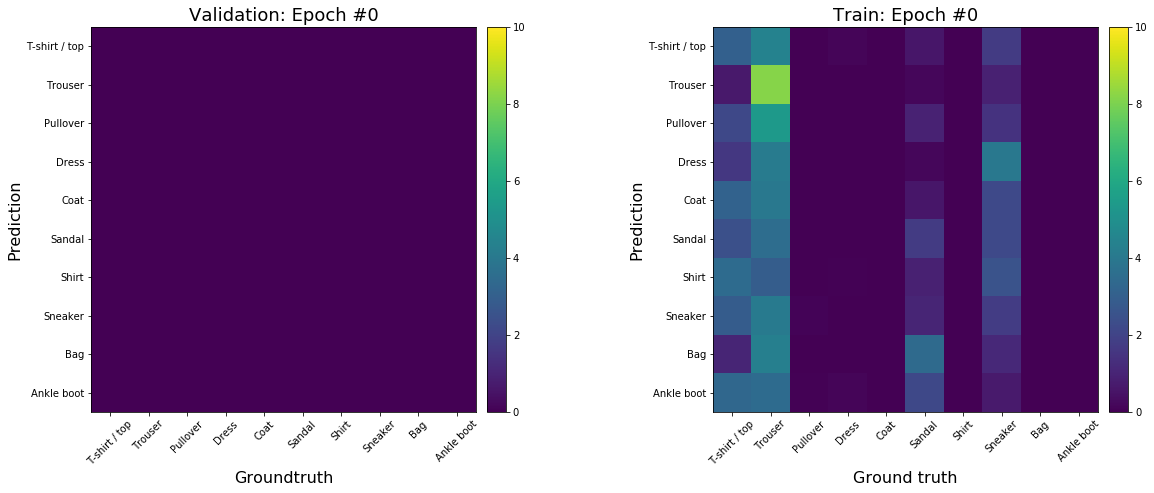

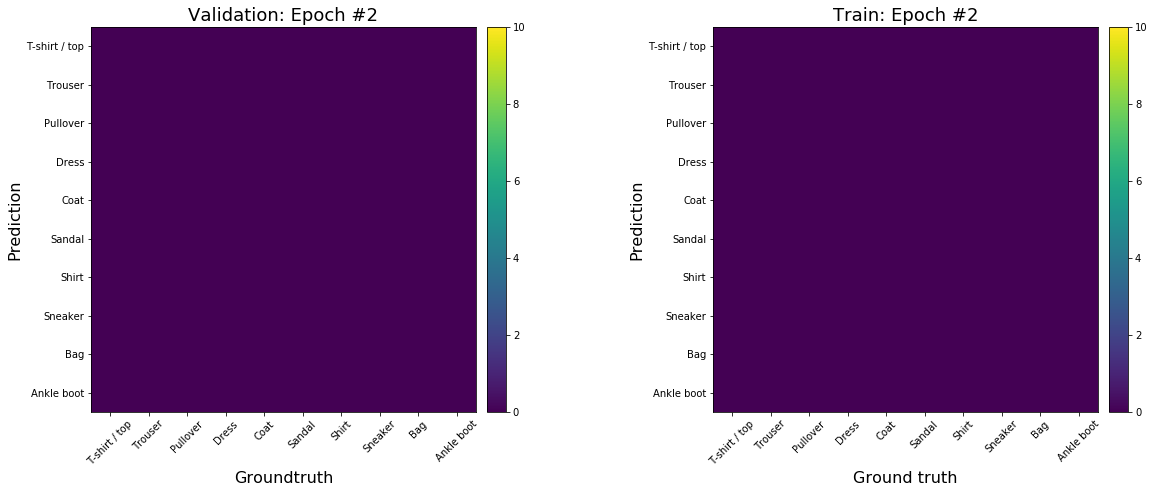

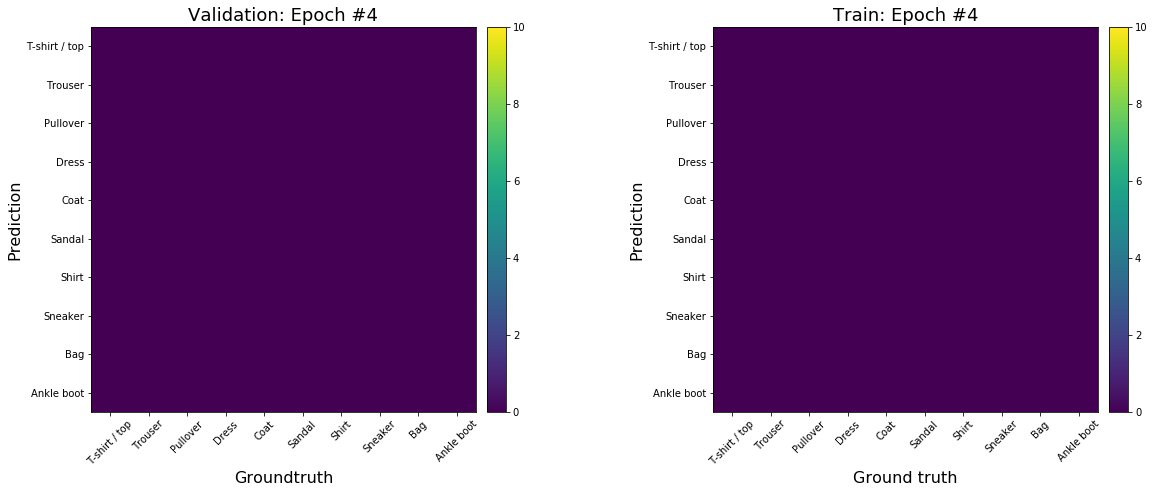

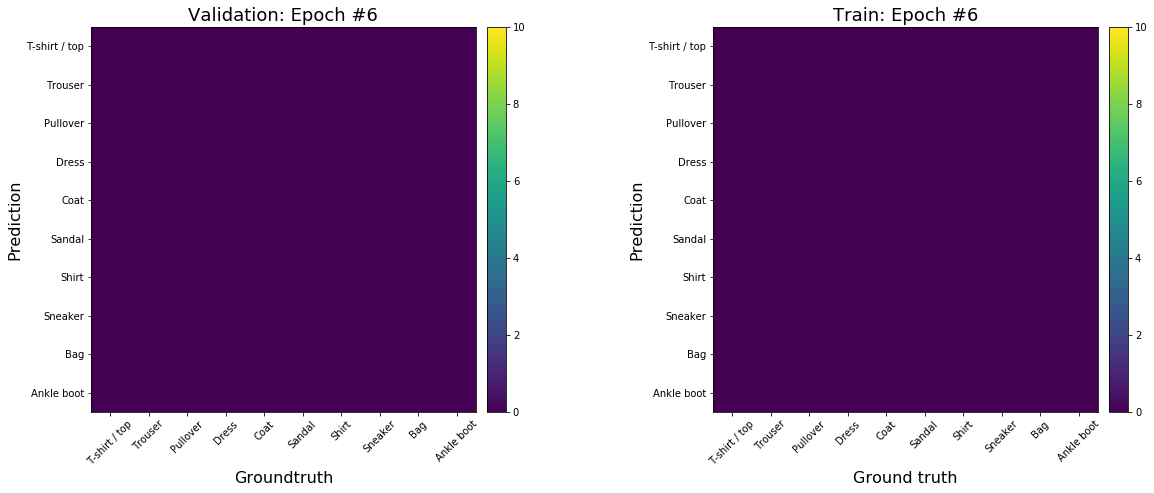

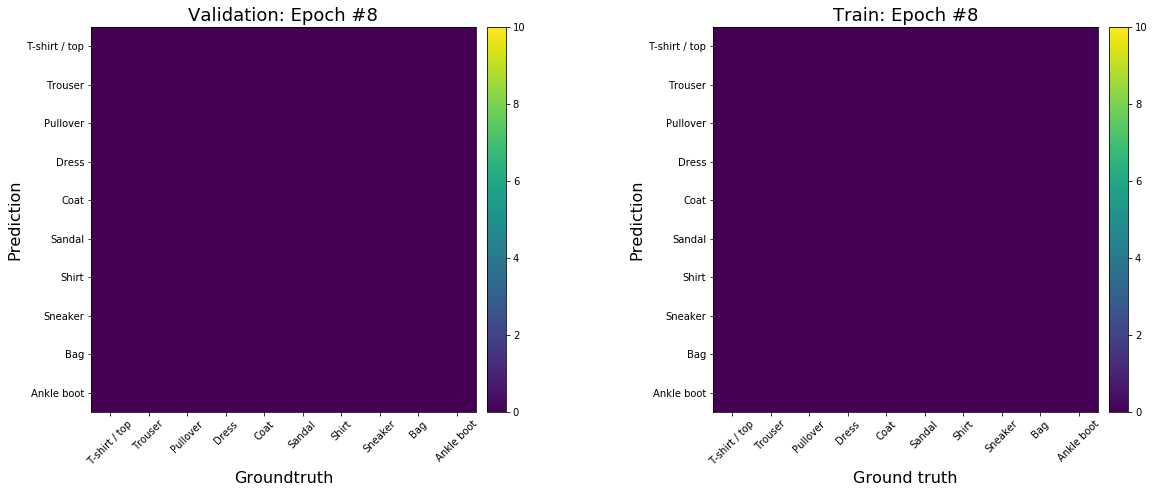

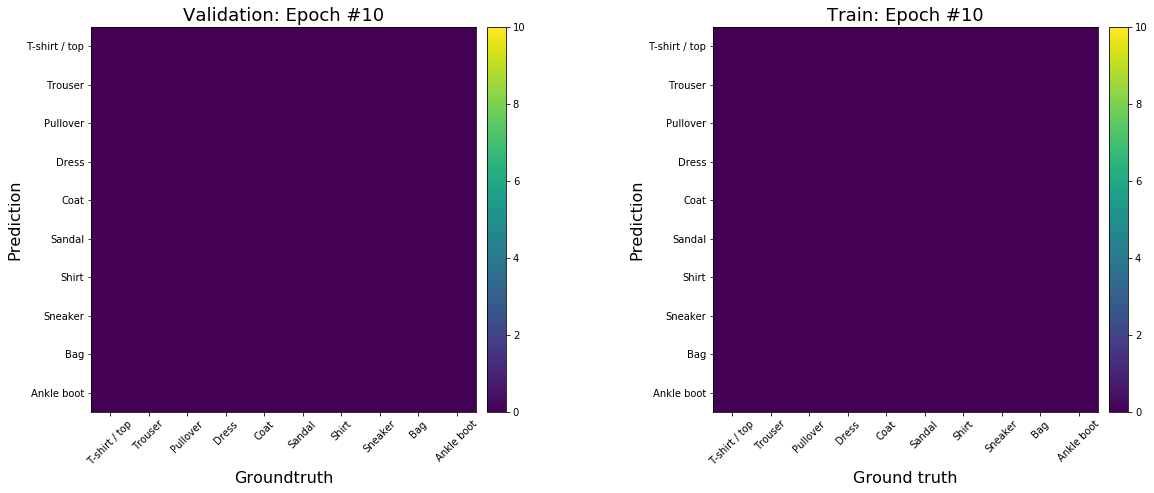

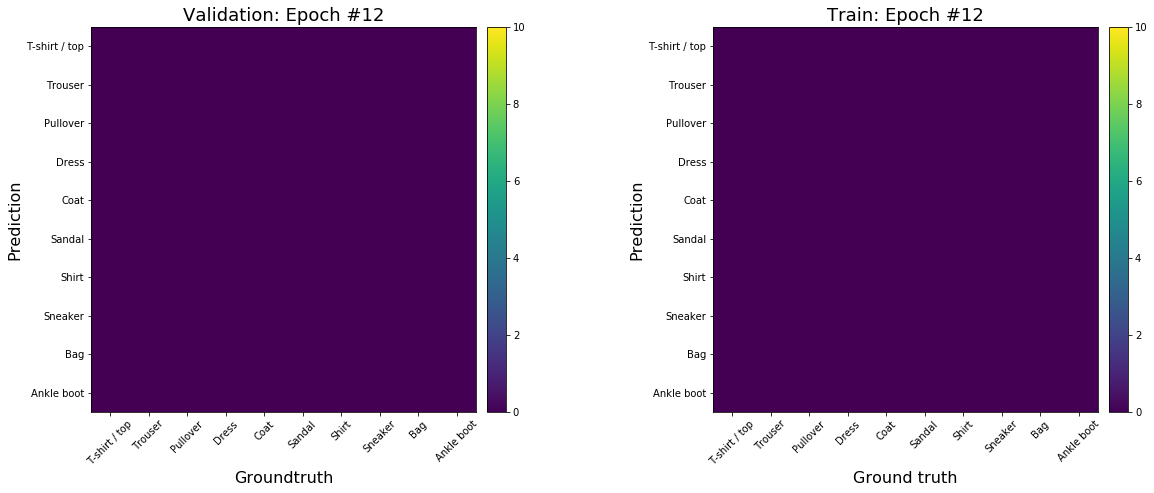

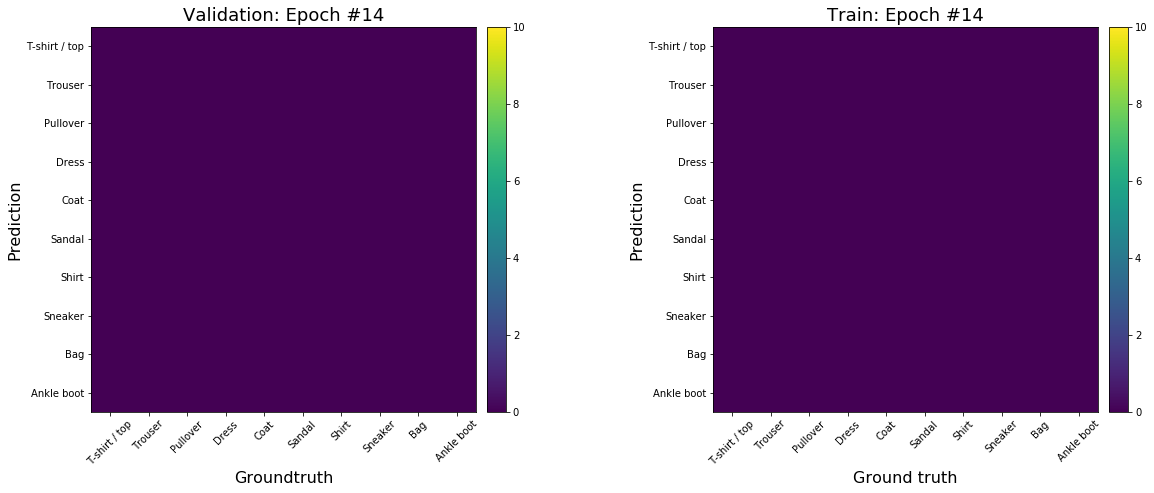

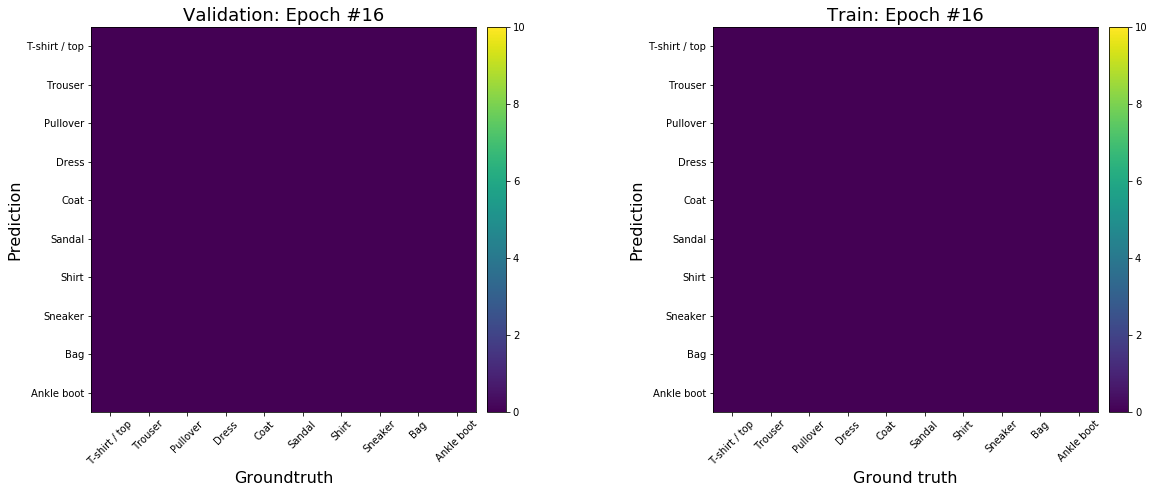

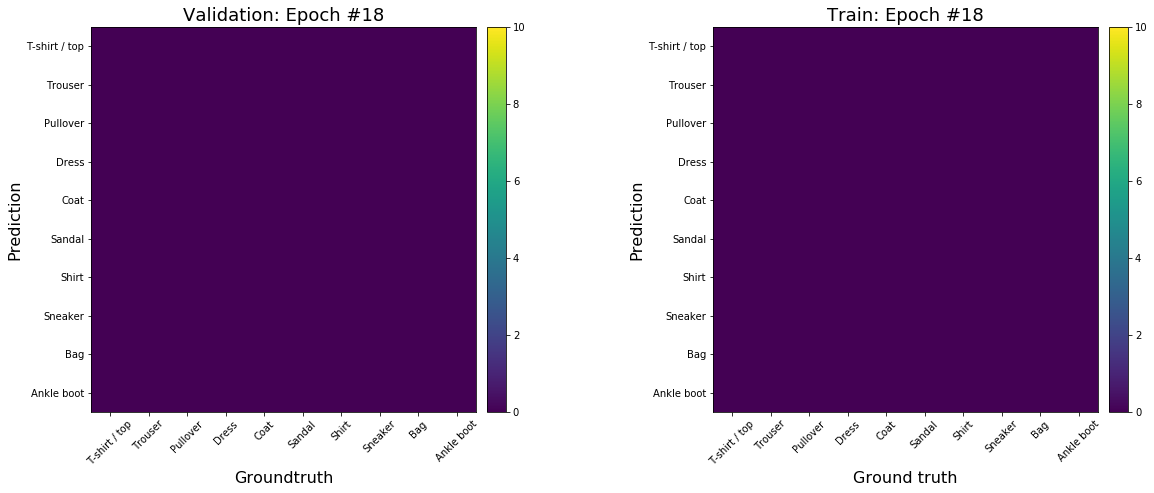

In [16]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

epoch_step                  = 2    
set_colorbar_max_percentage = 10 
    
# Plot confusion matrices
ticks = np.linspace(0,9,10)
gridspec_kwargs = dict(top=0.9, bottom=0.1, left=0.0, right=0.9, wspace=0.5, hspace=0.2)
for i in range(0, config['epochs'], epoch_step):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 16), gridspec_kw=gridspec_kwargs)
    im = ax1.imshow(val_confusion_matrix[:, :, i]*100)
    ax1.set_title(f'Validation: Epoch #{i}', fontsize=18)
    ax1.set_xticks(ticks=ticks)
    ax1.set_yticks(ticks=ticks)
    ax1.set_yticklabels(classes)
    im.set_clim(0.0, set_colorbar_max_percentage)
    ax1.set_xticklabels(classes, rotation=45)
    ax1.set_ylabel('Prediction', fontsize=16)
    ax1.set_xlabel('Groundtruth', fontsize=16)
    divider = make_axes_locatable(ax1)
    cax     = divider.append_axes('right', size='5%', pad=0.15)
    f.colorbar(im, cax=cax, orientation='vertical')
    
    im = ax2.imshow(train_confusion_matrix[:, :, i]*100)
    ax2.set_title(f'Train: Epoch #{i}', fontsize=18)
    ax2.set_xticks(ticks=ticks)
    ax2.set_yticks(ticks=ticks)
    ax2.set_yticklabels(classes)
    im.set_clim(0.0, set_colorbar_max_percentage)
    ax2.set_xticklabels(classes, rotation=45)
    ax2.set_ylabel('Prediction', fontsize=16)
    ax2.set_xlabel('Ground truth', fontsize=16)
    divider = make_axes_locatable(ax2)
    cax     = divider.append_axes('right', size='5%', pad=0.15)
    f.colorbar(im, cax=cax, orientation='vertical')    